In [1]:
import tensorflow.examples.tutorials.mnist as mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

In [2]:
%matplotlib inline

#### Dataset info

In [3]:
# source: http://yann.lecun.com/exdb/mnist/
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10

#### Loading files
Data is already preprocessed, shuffled and normalized.

In [4]:
mnist_dataset = mnist.input_data.read_data_sets('tensorflow/examples/tutorials/mnist', 
                                                one_hot=True, validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting tensorflow/examples/tutorials/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting tensorflow/examples/tutorials/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tensorflow/examples/tutorials/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tensorflow/examples/tutorials/mnist/t10k-labels-idx1-ubyte.gz


#### Data preparation

In [5]:
images_for_autoencoder = mnist_dataset.train.images
images_for_autoencoder_labels = mnist_dataset.train.labels.astype(np.float32)

test_images = mnist_dataset.test.images
test_images_labels = mnist_dataset.test.labels.astype(np.float32)

In [6]:
IMAGES_NUM = images_for_autoencoder.shape[0]

#### Data presentation

In [7]:
def show_digit(trainX, trainY, index):
    image = trainX[index].reshape([IMAGE_WIDTH, IMAGE_HEIGHT])
    label = trainY[index]
    plt.title("Training data, index: {},  Label: {}".format(index, label))
    plt.imshow(image, cmap="gray_r")
    plt.show()

Images: (60000, 784)
Labels: (60000, 10)


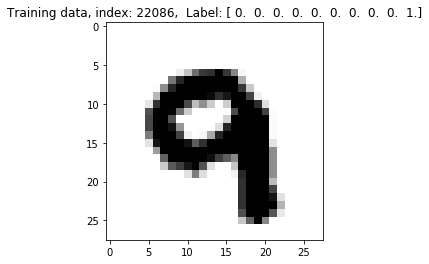

In [8]:
print("Images: " + str(images_for_autoencoder.shape))
print("Labels: " + str(images_for_autoencoder_labels.shape))
show_digit(images_for_autoencoder, images_for_autoencoder_labels, np.random.randint(1, IMAGES_NUM + 1))

#### Building Autoencoder

In [9]:
# reset tensorflow graph
tf.reset_default_graph()

In [10]:
inputs_ = tf.placeholder(tf.float32, [None, IMAGE_WIDTH * IMAGE_HEIGHT], "inputs")
targets_ = tf.placeholder(tf.float32, [None, IMAGE_WIDTH * IMAGE_HEIGHT], "targets")
learning_rate_ = tf.placeholder(tf.float32, None, name="learning_rate")

#### Encoder part

In [11]:
encoding_size = 64

In [12]:
# 28 * 28 MNIST image will be encoded into 'encoding_size' numbers
encoder_logits = tf.layers.dense(inputs_, encoding_size, activation=None)
encoded = tf.nn.relu(encoder_logits)

#### Decoder part

In [13]:
# 'encoding_size' numbers will be decoded into normalized image
decoder_logits = tf.layers.dense(encoded, IMAGE_WIDTH * IMAGE_HEIGHT, activation=None)
decoded = activation=tf.nn.sigmoid(decoder_logits)

#### Cost function and optimizer

In [14]:
# loss function
loss_value = tf.nn.sigmoid_cross_entropy_with_logits(logits=decoder_logits, labels=targets_)
cost_value = tf.reduce_mean(loss_value)

# gradient descent optimizer
optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost_value)

#### Hyperparameters

In [15]:
epochs = 30
batch_size = 48
num_batches = IMAGES_NUM // batch_size
learning_rate = 0.0005

#### Prepare batches

In [16]:
def prepare_mini_batches(data, labels, batch_size):
    assert len(data) == len(labels)
    
    all_batches = list()
    for i in range(0, len(data)):
        all_batches.append((data[i], labels[i]))
    random.shuffle(all_batches)
        
    mini_batches = list()
    while len(all_batches) >= batch_size:
        
        data_batch = list()
        labels_batch = list()
        for j in range(0, batch_size):
            data, labels = all_batches.pop()
            data_batch.append(data)
            labels_batch.append(labels)
            
        mini_batches.append((np.array(data_batch), np.array(labels_batch)))
    
    return mini_batches

#### Training cycle

In [17]:
session = tf.Session()

In [18]:
info = {'losses':[]}

session.run(tf.global_variables_initializer())
for epoch in range(epochs):
    mini_batches = prepare_mini_batches(images_for_autoencoder, 
                                        images_for_autoencoder_labels, 
                                        batch_size)

    epoch_losses = []
    while mini_batches:
        data_inputs, data_labels = mini_batches.pop()
        
        # target for net is to decrease image size (encode) 
        # and return the same image as inserted (decode)
        session.run(optimizer, feed_dict={inputs_: data_inputs, 
                                          targets_: data_inputs, 
                                          learning_rate_: learning_rate})
        
        batch_loss = session.run(cost_value, feed_dict={inputs_: data_inputs, 
                                                        targets_: data_inputs})
        epoch_losses.append(batch_loss)
    
        print("Epoch: {}/{}...".format(epoch + 1, epochs),
              "Training loss: {:.4f}".format(batch_loss))
        
    info['losses'].extend(epoch_losses)

Epoch: 1/30... Training loss: 0.6928
Epoch: 1/30... Training loss: 0.6899
Epoch: 1/30... Training loss: 0.6865
Epoch: 1/30... Training loss: 0.6831
Epoch: 1/30... Training loss: 0.6796
Epoch: 1/30... Training loss: 0.6754
Epoch: 1/30... Training loss: 0.6722
Epoch: 1/30... Training loss: 0.6663
Epoch: 1/30... Training loss: 0.6622
Epoch: 1/30... Training loss: 0.6550
Epoch: 1/30... Training loss: 0.6501
Epoch: 1/30... Training loss: 0.6420
Epoch: 1/30... Training loss: 0.6342
Epoch: 1/30... Training loss: 0.6262
Epoch: 1/30... Training loss: 0.6155
Epoch: 1/30... Training loss: 0.6067
Epoch: 1/30... Training loss: 0.5989
Epoch: 1/30... Training loss: 0.5896
Epoch: 1/30... Training loss: 0.5774
Epoch: 1/30... Training loss: 0.5604
Epoch: 1/30... Training loss: 0.5520
Epoch: 1/30... Training loss: 0.5470
Epoch: 1/30... Training loss: 0.5262
Epoch: 1/30... Training loss: 0.5159
Epoch: 1/30... Training loss: 0.4928
Epoch: 1/30... Training loss: 0.4852
Epoch: 1/30... Training loss: 0.4800
E

Epoch: 1/30... Training loss: 0.1989
Epoch: 1/30... Training loss: 0.2224
Epoch: 1/30... Training loss: 0.2072
Epoch: 1/30... Training loss: 0.2011
Epoch: 1/30... Training loss: 0.2091
Epoch: 1/30... Training loss: 0.2076
Epoch: 1/30... Training loss: 0.2054
Epoch: 1/30... Training loss: 0.2094
Epoch: 1/30... Training loss: 0.2144
Epoch: 1/30... Training loss: 0.2031
Epoch: 1/30... Training loss: 0.2131
Epoch: 1/30... Training loss: 0.2110
Epoch: 1/30... Training loss: 0.1951
Epoch: 1/30... Training loss: 0.2078
Epoch: 1/30... Training loss: 0.1962
Epoch: 1/30... Training loss: 0.2119
Epoch: 1/30... Training loss: 0.2099
Epoch: 1/30... Training loss: 0.2050
Epoch: 1/30... Training loss: 0.2090
Epoch: 1/30... Training loss: 0.2088
Epoch: 1/30... Training loss: 0.2137
Epoch: 1/30... Training loss: 0.2109
Epoch: 1/30... Training loss: 0.2047
Epoch: 1/30... Training loss: 0.2126
Epoch: 1/30... Training loss: 0.2176
Epoch: 1/30... Training loss: 0.2010
Epoch: 1/30... Training loss: 0.2080
E

Epoch: 1/30... Training loss: 0.1735
Epoch: 1/30... Training loss: 0.1580
Epoch: 1/30... Training loss: 0.1937
Epoch: 1/30... Training loss: 0.1799
Epoch: 1/30... Training loss: 0.1675
Epoch: 1/30... Training loss: 0.1610
Epoch: 1/30... Training loss: 0.1704
Epoch: 1/30... Training loss: 0.1710
Epoch: 1/30... Training loss: 0.1776
Epoch: 1/30... Training loss: 0.1605
Epoch: 1/30... Training loss: 0.1633
Epoch: 1/30... Training loss: 0.1751
Epoch: 1/30... Training loss: 0.1928
Epoch: 1/30... Training loss: 0.1681
Epoch: 1/30... Training loss: 0.1734
Epoch: 1/30... Training loss: 0.1708
Epoch: 1/30... Training loss: 0.1637
Epoch: 1/30... Training loss: 0.1691
Epoch: 1/30... Training loss: 0.1804
Epoch: 1/30... Training loss: 0.1767
Epoch: 1/30... Training loss: 0.1943
Epoch: 1/30... Training loss: 0.1677
Epoch: 1/30... Training loss: 0.1676
Epoch: 1/30... Training loss: 0.1694
Epoch: 1/30... Training loss: 0.1679
Epoch: 1/30... Training loss: 0.1648
Epoch: 1/30... Training loss: 0.1676
E

Epoch: 1/30... Training loss: 0.1577
Epoch: 1/30... Training loss: 0.1526
Epoch: 1/30... Training loss: 0.1595
Epoch: 1/30... Training loss: 0.1555
Epoch: 1/30... Training loss: 0.1630
Epoch: 1/30... Training loss: 0.1530
Epoch: 1/30... Training loss: 0.1502
Epoch: 1/30... Training loss: 0.1575
Epoch: 1/30... Training loss: 0.1503
Epoch: 1/30... Training loss: 0.1523
Epoch: 1/30... Training loss: 0.1479
Epoch: 1/30... Training loss: 0.1526
Epoch: 1/30... Training loss: 0.1497
Epoch: 1/30... Training loss: 0.1549
Epoch: 1/30... Training loss: 0.1645
Epoch: 1/30... Training loss: 0.1567
Epoch: 1/30... Training loss: 0.1525
Epoch: 1/30... Training loss: 0.1425
Epoch: 1/30... Training loss: 0.1488
Epoch: 1/30... Training loss: 0.1507
Epoch: 1/30... Training loss: 0.1419
Epoch: 1/30... Training loss: 0.1492
Epoch: 1/30... Training loss: 0.1504
Epoch: 1/30... Training loss: 0.1483
Epoch: 1/30... Training loss: 0.1496
Epoch: 1/30... Training loss: 0.1536
Epoch: 1/30... Training loss: 0.1622
E

Epoch: 1/30... Training loss: 0.1466
Epoch: 1/30... Training loss: 0.1375
Epoch: 1/30... Training loss: 0.1422
Epoch: 1/30... Training loss: 0.1402
Epoch: 1/30... Training loss: 0.1316
Epoch: 1/30... Training loss: 0.1373
Epoch: 1/30... Training loss: 0.1383
Epoch: 1/30... Training loss: 0.1297
Epoch: 1/30... Training loss: 0.1370
Epoch: 1/30... Training loss: 0.1353
Epoch: 1/30... Training loss: 0.1371
Epoch: 1/30... Training loss: 0.1464
Epoch: 1/30... Training loss: 0.1428
Epoch: 1/30... Training loss: 0.1362
Epoch: 1/30... Training loss: 0.1382
Epoch: 1/30... Training loss: 0.1386
Epoch: 1/30... Training loss: 0.1261
Epoch: 1/30... Training loss: 0.1451
Epoch: 1/30... Training loss: 0.1489
Epoch: 1/30... Training loss: 0.1411
Epoch: 1/30... Training loss: 0.1377
Epoch: 1/30... Training loss: 0.1379
Epoch: 1/30... Training loss: 0.1299
Epoch: 1/30... Training loss: 0.1346
Epoch: 1/30... Training loss: 0.1382
Epoch: 1/30... Training loss: 0.1435
Epoch: 1/30... Training loss: 0.1238
E

Epoch: 1/30... Training loss: 0.1274
Epoch: 1/30... Training loss: 0.1242
Epoch: 1/30... Training loss: 0.1225
Epoch: 1/30... Training loss: 0.1169
Epoch: 1/30... Training loss: 0.1321
Epoch: 1/30... Training loss: 0.1345
Epoch: 1/30... Training loss: 0.1352
Epoch: 1/30... Training loss: 0.1277
Epoch: 1/30... Training loss: 0.1357
Epoch: 1/30... Training loss: 0.1307
Epoch: 1/30... Training loss: 0.1272
Epoch: 1/30... Training loss: 0.1257
Epoch: 1/30... Training loss: 0.1267
Epoch: 1/30... Training loss: 0.1339
Epoch: 1/30... Training loss: 0.1266
Epoch: 1/30... Training loss: 0.1259
Epoch: 1/30... Training loss: 0.1227
Epoch: 1/30... Training loss: 0.1305
Epoch: 1/30... Training loss: 0.1289
Epoch: 1/30... Training loss: 0.1313
Epoch: 1/30... Training loss: 0.1180
Epoch: 1/30... Training loss: 0.1340
Epoch: 1/30... Training loss: 0.1302
Epoch: 1/30... Training loss: 0.1294
Epoch: 1/30... Training loss: 0.1266
Epoch: 1/30... Training loss: 0.1316
Epoch: 1/30... Training loss: 0.1300
E

Epoch: 2/30... Training loss: 0.1173
Epoch: 2/30... Training loss: 0.1222
Epoch: 2/30... Training loss: 0.1202
Epoch: 2/30... Training loss: 0.1103
Epoch: 2/30... Training loss: 0.1147
Epoch: 2/30... Training loss: 0.1172
Epoch: 2/30... Training loss: 0.1257
Epoch: 2/30... Training loss: 0.1189
Epoch: 2/30... Training loss: 0.1201
Epoch: 2/30... Training loss: 0.1141
Epoch: 2/30... Training loss: 0.1187
Epoch: 2/30... Training loss: 0.1184
Epoch: 2/30... Training loss: 0.1124
Epoch: 2/30... Training loss: 0.1278
Epoch: 2/30... Training loss: 0.1155
Epoch: 2/30... Training loss: 0.1241
Epoch: 2/30... Training loss: 0.1231
Epoch: 2/30... Training loss: 0.1225
Epoch: 2/30... Training loss: 0.1162
Epoch: 2/30... Training loss: 0.1167
Epoch: 2/30... Training loss: 0.1146
Epoch: 2/30... Training loss: 0.1236
Epoch: 2/30... Training loss: 0.1172
Epoch: 2/30... Training loss: 0.1138
Epoch: 2/30... Training loss: 0.1242
Epoch: 2/30... Training loss: 0.1103
Epoch: 2/30... Training loss: 0.1172
E

Epoch: 2/30... Training loss: 0.1153
Epoch: 2/30... Training loss: 0.1055
Epoch: 2/30... Training loss: 0.1055
Epoch: 2/30... Training loss: 0.1140
Epoch: 2/30... Training loss: 0.1167
Epoch: 2/30... Training loss: 0.1152
Epoch: 2/30... Training loss: 0.1096
Epoch: 2/30... Training loss: 0.1112
Epoch: 2/30... Training loss: 0.1121
Epoch: 2/30... Training loss: 0.1155
Epoch: 2/30... Training loss: 0.1120
Epoch: 2/30... Training loss: 0.1078
Epoch: 2/30... Training loss: 0.1230
Epoch: 2/30... Training loss: 0.1111
Epoch: 2/30... Training loss: 0.1163
Epoch: 2/30... Training loss: 0.1143
Epoch: 2/30... Training loss: 0.1124
Epoch: 2/30... Training loss: 0.1192
Epoch: 2/30... Training loss: 0.1090
Epoch: 2/30... Training loss: 0.1116
Epoch: 2/30... Training loss: 0.1174
Epoch: 2/30... Training loss: 0.1153
Epoch: 2/30... Training loss: 0.1136
Epoch: 2/30... Training loss: 0.1145
Epoch: 2/30... Training loss: 0.1125
Epoch: 2/30... Training loss: 0.1152
Epoch: 2/30... Training loss: 0.1140
E

Epoch: 2/30... Training loss: 0.1092
Epoch: 2/30... Training loss: 0.1149
Epoch: 2/30... Training loss: 0.1022
Epoch: 2/30... Training loss: 0.1098
Epoch: 2/30... Training loss: 0.1079
Epoch: 2/30... Training loss: 0.1100
Epoch: 2/30... Training loss: 0.1077
Epoch: 2/30... Training loss: 0.1058
Epoch: 2/30... Training loss: 0.1067
Epoch: 2/30... Training loss: 0.1056
Epoch: 2/30... Training loss: 0.1022
Epoch: 2/30... Training loss: 0.1020
Epoch: 2/30... Training loss: 0.1086
Epoch: 2/30... Training loss: 0.1044
Epoch: 2/30... Training loss: 0.1065
Epoch: 2/30... Training loss: 0.1007
Epoch: 2/30... Training loss: 0.1078
Epoch: 2/30... Training loss: 0.1016
Epoch: 2/30... Training loss: 0.1095
Epoch: 2/30... Training loss: 0.1143
Epoch: 2/30... Training loss: 0.1084
Epoch: 2/30... Training loss: 0.1035
Epoch: 2/30... Training loss: 0.1058
Epoch: 2/30... Training loss: 0.1001
Epoch: 2/30... Training loss: 0.1000
Epoch: 2/30... Training loss: 0.1081
Epoch: 2/30... Training loss: 0.1111
E

Epoch: 2/30... Training loss: 0.1044
Epoch: 2/30... Training loss: 0.1102
Epoch: 2/30... Training loss: 0.1006
Epoch: 2/30... Training loss: 0.1049
Epoch: 2/30... Training loss: 0.0908
Epoch: 2/30... Training loss: 0.1016
Epoch: 2/30... Training loss: 0.0937
Epoch: 2/30... Training loss: 0.0999
Epoch: 2/30... Training loss: 0.0948
Epoch: 2/30... Training loss: 0.0925
Epoch: 2/30... Training loss: 0.0980
Epoch: 2/30... Training loss: 0.1044
Epoch: 2/30... Training loss: 0.1078
Epoch: 2/30... Training loss: 0.1000
Epoch: 2/30... Training loss: 0.1028
Epoch: 2/30... Training loss: 0.1019
Epoch: 2/30... Training loss: 0.1024
Epoch: 2/30... Training loss: 0.0962
Epoch: 2/30... Training loss: 0.1000
Epoch: 2/30... Training loss: 0.1030
Epoch: 2/30... Training loss: 0.1022
Epoch: 2/30... Training loss: 0.0934
Epoch: 2/30... Training loss: 0.1024
Epoch: 2/30... Training loss: 0.1006
Epoch: 2/30... Training loss: 0.1051
Epoch: 2/30... Training loss: 0.1013
Epoch: 2/30... Training loss: 0.0984
E

Epoch: 3/30... Training loss: 0.0902
Epoch: 3/30... Training loss: 0.1023
Epoch: 3/30... Training loss: 0.0937
Epoch: 3/30... Training loss: 0.0979
Epoch: 3/30... Training loss: 0.0997
Epoch: 3/30... Training loss: 0.0975
Epoch: 3/30... Training loss: 0.0977
Epoch: 3/30... Training loss: 0.0976
Epoch: 3/30... Training loss: 0.0988
Epoch: 3/30... Training loss: 0.0952
Epoch: 3/30... Training loss: 0.1019
Epoch: 3/30... Training loss: 0.0961
Epoch: 3/30... Training loss: 0.0934
Epoch: 3/30... Training loss: 0.1020
Epoch: 3/30... Training loss: 0.0949
Epoch: 3/30... Training loss: 0.1039
Epoch: 3/30... Training loss: 0.0962
Epoch: 3/30... Training loss: 0.0970
Epoch: 3/30... Training loss: 0.0980
Epoch: 3/30... Training loss: 0.0997
Epoch: 3/30... Training loss: 0.1032
Epoch: 3/30... Training loss: 0.0975
Epoch: 3/30... Training loss: 0.0951
Epoch: 3/30... Training loss: 0.0948
Epoch: 3/30... Training loss: 0.1011
Epoch: 3/30... Training loss: 0.0937
Epoch: 3/30... Training loss: 0.0940
E

Epoch: 3/30... Training loss: 0.1040
Epoch: 3/30... Training loss: 0.0877
Epoch: 3/30... Training loss: 0.0906
Epoch: 3/30... Training loss: 0.0955
Epoch: 3/30... Training loss: 0.0920
Epoch: 3/30... Training loss: 0.0932
Epoch: 3/30... Training loss: 0.1037
Epoch: 3/30... Training loss: 0.0935
Epoch: 3/30... Training loss: 0.0950
Epoch: 3/30... Training loss: 0.0923
Epoch: 3/30... Training loss: 0.0892
Epoch: 3/30... Training loss: 0.0944
Epoch: 3/30... Training loss: 0.0932
Epoch: 3/30... Training loss: 0.0932
Epoch: 3/30... Training loss: 0.0856
Epoch: 3/30... Training loss: 0.0945
Epoch: 3/30... Training loss: 0.0869
Epoch: 3/30... Training loss: 0.0977
Epoch: 3/30... Training loss: 0.0962
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0920
Epoch: 3/30... Training loss: 0.1008
Epoch: 3/30... Training loss: 0.0957
Epoch: 3/30... Training loss: 0.0924
Epoch: 3/30... Training loss: 0.0970
Epoch: 3/30... Training loss: 0.0982
E

Epoch: 3/30... Training loss: 0.0967
Epoch: 3/30... Training loss: 0.0926
Epoch: 3/30... Training loss: 0.0931
Epoch: 3/30... Training loss: 0.0859
Epoch: 3/30... Training loss: 0.0944
Epoch: 3/30... Training loss: 0.0929
Epoch: 3/30... Training loss: 0.0920
Epoch: 3/30... Training loss: 0.0886
Epoch: 3/30... Training loss: 0.0941
Epoch: 3/30... Training loss: 0.0929
Epoch: 3/30... Training loss: 0.0945
Epoch: 3/30... Training loss: 0.0938
Epoch: 3/30... Training loss: 0.0956
Epoch: 3/30... Training loss: 0.0841
Epoch: 3/30... Training loss: 0.0902
Epoch: 3/30... Training loss: 0.0891
Epoch: 3/30... Training loss: 0.0898
Epoch: 3/30... Training loss: 0.0954
Epoch: 3/30... Training loss: 0.0856
Epoch: 3/30... Training loss: 0.0974
Epoch: 3/30... Training loss: 0.0922
Epoch: 3/30... Training loss: 0.0851
Epoch: 3/30... Training loss: 0.0940
Epoch: 3/30... Training loss: 0.0935
Epoch: 3/30... Training loss: 0.0904
Epoch: 3/30... Training loss: 0.0929
Epoch: 3/30... Training loss: 0.0916
E

Epoch: 3/30... Training loss: 0.0890
Epoch: 3/30... Training loss: 0.0860
Epoch: 3/30... Training loss: 0.0842
Epoch: 3/30... Training loss: 0.0903
Epoch: 3/30... Training loss: 0.0923
Epoch: 3/30... Training loss: 0.0881
Epoch: 3/30... Training loss: 0.0887
Epoch: 3/30... Training loss: 0.0894
Epoch: 3/30... Training loss: 0.0916
Epoch: 3/30... Training loss: 0.0860
Epoch: 3/30... Training loss: 0.0907
Epoch: 3/30... Training loss: 0.0908
Epoch: 3/30... Training loss: 0.0894
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0870
Epoch: 3/30... Training loss: 0.0865
Epoch: 3/30... Training loss: 0.0937
Epoch: 3/30... Training loss: 0.0896
Epoch: 3/30... Training loss: 0.0902
Epoch: 3/30... Training loss: 0.0911
Epoch: 3/30... Training loss: 0.0878
Epoch: 3/30... Training loss: 0.0865
Epoch: 3/30... Training loss: 0.0855
Epoch: 3/30... Training loss: 0.0883
Epoch: 3/30... Training loss: 0.0817
Epoch: 3/30... Training loss: 0.0897
Epoch: 3/30... Training loss: 0.0941
E

Epoch: 3/30... Training loss: 0.0844
Epoch: 3/30... Training loss: 0.0915
Epoch: 3/30... Training loss: 0.0885
Epoch: 3/30... Training loss: 0.0875
Epoch: 3/30... Training loss: 0.0780
Epoch: 3/30... Training loss: 0.0892
Epoch: 3/30... Training loss: 0.0901
Epoch: 3/30... Training loss: 0.0834
Epoch: 3/30... Training loss: 0.0821
Epoch: 3/30... Training loss: 0.0858
Epoch: 3/30... Training loss: 0.0871
Epoch: 3/30... Training loss: 0.0844
Epoch: 3/30... Training loss: 0.0855
Epoch: 3/30... Training loss: 0.0886
Epoch: 3/30... Training loss: 0.0906
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0895
Epoch: 3/30... Training loss: 0.0859
Epoch: 3/30... Training loss: 0.0866
Epoch: 3/30... Training loss: 0.0817
Epoch: 3/30... Training loss: 0.0856
Epoch: 3/30... Training loss: 0.0868
Epoch: 3/30... Training loss: 0.0881
Epoch: 3/30... Training loss: 0.0814
Epoch: 3/30... Training loss: 0.0933
Epoch: 3/30... Training loss: 0.0872
Epoch: 3/30... Training loss: 0.0866
E

Epoch: 4/30... Training loss: 0.0834
Epoch: 4/30... Training loss: 0.0881
Epoch: 4/30... Training loss: 0.0881
Epoch: 4/30... Training loss: 0.0812
Epoch: 4/30... Training loss: 0.0921
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0869
Epoch: 4/30... Training loss: 0.0775
Epoch: 4/30... Training loss: 0.0832
Epoch: 4/30... Training loss: 0.0813
Epoch: 4/30... Training loss: 0.0886
Epoch: 4/30... Training loss: 0.0842
Epoch: 4/30... Training loss: 0.0844
Epoch: 4/30... Training loss: 0.0815
Epoch: 4/30... Training loss: 0.0852
Epoch: 4/30... Training loss: 0.0853
Epoch: 4/30... Training loss: 0.0822
Epoch: 4/30... Training loss: 0.0865
Epoch: 4/30... Training loss: 0.0824
Epoch: 4/30... Training loss: 0.0838
Epoch: 4/30... Training loss: 0.0874
Epoch: 4/30... Training loss: 0.0810
Epoch: 4/30... Training loss: 0.0856
Epoch: 4/30... Training loss: 0.0885
Epoch: 4/30... Training loss: 0.0823
Epoch: 4/30... Training loss: 0.0804
Epoch: 4/30... Training loss: 0.0844
E

Epoch: 4/30... Training loss: 0.0792
Epoch: 4/30... Training loss: 0.0788
Epoch: 4/30... Training loss: 0.0842
Epoch: 4/30... Training loss: 0.0822
Epoch: 4/30... Training loss: 0.0885
Epoch: 4/30... Training loss: 0.0857
Epoch: 4/30... Training loss: 0.0828
Epoch: 4/30... Training loss: 0.0866
Epoch: 4/30... Training loss: 0.0864
Epoch: 4/30... Training loss: 0.0822
Epoch: 4/30... Training loss: 0.0834
Epoch: 4/30... Training loss: 0.0854
Epoch: 4/30... Training loss: 0.0824
Epoch: 4/30... Training loss: 0.0877
Epoch: 4/30... Training loss: 0.0829
Epoch: 4/30... Training loss: 0.0818
Epoch: 4/30... Training loss: 0.0855
Epoch: 4/30... Training loss: 0.0786
Epoch: 4/30... Training loss: 0.0834
Epoch: 4/30... Training loss: 0.0895
Epoch: 4/30... Training loss: 0.0789
Epoch: 4/30... Training loss: 0.0753
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0849
Epoch: 4/30... Training loss: 0.0827
Epoch: 4/30... Training loss: 0.0795
Epoch: 4/30... Training loss: 0.0885
E

Epoch: 4/30... Training loss: 0.0856
Epoch: 4/30... Training loss: 0.0803
Epoch: 4/30... Training loss: 0.0844
Epoch: 4/30... Training loss: 0.0831
Epoch: 4/30... Training loss: 0.0831
Epoch: 4/30... Training loss: 0.0793
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0771
Epoch: 4/30... Training loss: 0.0839
Epoch: 4/30... Training loss: 0.0802
Epoch: 4/30... Training loss: 0.0813
Epoch: 4/30... Training loss: 0.0799
Epoch: 4/30... Training loss: 0.0796
Epoch: 4/30... Training loss: 0.0835
Epoch: 4/30... Training loss: 0.0829
Epoch: 4/30... Training loss: 0.0799
Epoch: 4/30... Training loss: 0.0778
Epoch: 4/30... Training loss: 0.0792
Epoch: 4/30... Training loss: 0.0778
Epoch: 4/30... Training loss: 0.0840
Epoch: 4/30... Training loss: 0.0867
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0759
Epoch: 4/30... Training loss: 0.0793
Epoch: 4/30... Training loss: 0.0854
Epoch: 4/30... Training loss: 0.0798
Epoch: 4/30... Training loss: 0.0805
E

Epoch: 4/30... Training loss: 0.0788
Epoch: 4/30... Training loss: 0.0819
Epoch: 4/30... Training loss: 0.0836
Epoch: 4/30... Training loss: 0.0783
Epoch: 4/30... Training loss: 0.0815
Epoch: 4/30... Training loss: 0.0829
Epoch: 4/30... Training loss: 0.0779
Epoch: 4/30... Training loss: 0.0809
Epoch: 4/30... Training loss: 0.0877
Epoch: 4/30... Training loss: 0.0799
Epoch: 4/30... Training loss: 0.0809
Epoch: 4/30... Training loss: 0.0796
Epoch: 4/30... Training loss: 0.0772
Epoch: 4/30... Training loss: 0.0833
Epoch: 4/30... Training loss: 0.0757
Epoch: 4/30... Training loss: 0.0768
Epoch: 4/30... Training loss: 0.0815
Epoch: 4/30... Training loss: 0.0748
Epoch: 4/30... Training loss: 0.0823
Epoch: 4/30... Training loss: 0.0823
Epoch: 4/30... Training loss: 0.0859
Epoch: 4/30... Training loss: 0.0857
Epoch: 4/30... Training loss: 0.0831
Epoch: 4/30... Training loss: 0.0831
Epoch: 4/30... Training loss: 0.0811
Epoch: 4/30... Training loss: 0.0777
Epoch: 4/30... Training loss: 0.0811
E

Epoch: 4/30... Training loss: 0.0786
Epoch: 4/30... Training loss: 0.0769
Epoch: 4/30... Training loss: 0.0772
Epoch: 4/30... Training loss: 0.0807
Epoch: 4/30... Training loss: 0.0818
Epoch: 4/30... Training loss: 0.0770
Epoch: 4/30... Training loss: 0.0765
Epoch: 4/30... Training loss: 0.0846
Epoch: 4/30... Training loss: 0.0825
Epoch: 4/30... Training loss: 0.0848
Epoch: 4/30... Training loss: 0.0854
Epoch: 4/30... Training loss: 0.0888
Epoch: 4/30... Training loss: 0.0863
Epoch: 4/30... Training loss: 0.0753
Epoch: 5/30... Training loss: 0.0789
Epoch: 5/30... Training loss: 0.0784
Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0831
Epoch: 5/30... Training loss: 0.0842
Epoch: 5/30... Training loss: 0.0848
Epoch: 5/30... Training loss: 0.0754
Epoch: 5/30... Training loss: 0.0813
Epoch: 5/30... Training loss: 0.0783
Epoch: 5/30... Training loss: 0.0772
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0851
E

Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0801
Epoch: 5/30... Training loss: 0.0773
Epoch: 5/30... Training loss: 0.0828
Epoch: 5/30... Training loss: 0.0794
Epoch: 5/30... Training loss: 0.0800
Epoch: 5/30... Training loss: 0.0785
Epoch: 5/30... Training loss: 0.0816
Epoch: 5/30... Training loss: 0.0791
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0861
Epoch: 5/30... Training loss: 0.0768
Epoch: 5/30... Training loss: 0.0805
Epoch: 5/30... Training loss: 0.0836
Epoch: 5/30... Training loss: 0.0744
Epoch: 5/30... Training loss: 0.0784
Epoch: 5/30... Training loss: 0.0795
Epoch: 5/30... Training loss: 0.0778
Epoch: 5/30... Training loss: 0.0805
Epoch: 5/30... Training loss: 0.0797
Epoch: 5/30... Training loss: 0.0790
Epoch: 5/30... Training loss: 0.0843
Epoch: 5/30... Training loss: 0.0776
Epoch: 5/30... Training loss: 0.0762
Epoch: 5/30... Training loss: 0.0838
Epoch: 5/30... Training loss: 0.0880
Epoch: 5/30... Training loss: 0.0751
E

Epoch: 5/30... Training loss: 0.0823
Epoch: 5/30... Training loss: 0.0821
Epoch: 5/30... Training loss: 0.0794
Epoch: 5/30... Training loss: 0.0782
Epoch: 5/30... Training loss: 0.0799
Epoch: 5/30... Training loss: 0.0777
Epoch: 5/30... Training loss: 0.0811
Epoch: 5/30... Training loss: 0.0777
Epoch: 5/30... Training loss: 0.0781
Epoch: 5/30... Training loss: 0.0745
Epoch: 5/30... Training loss: 0.0833
Epoch: 5/30... Training loss: 0.0781
Epoch: 5/30... Training loss: 0.0757
Epoch: 5/30... Training loss: 0.0814
Epoch: 5/30... Training loss: 0.0790
Epoch: 5/30... Training loss: 0.0790
Epoch: 5/30... Training loss: 0.0786
Epoch: 5/30... Training loss: 0.0822
Epoch: 5/30... Training loss: 0.0800
Epoch: 5/30... Training loss: 0.0767
Epoch: 5/30... Training loss: 0.0829
Epoch: 5/30... Training loss: 0.0773
Epoch: 5/30... Training loss: 0.0768
Epoch: 5/30... Training loss: 0.0725
Epoch: 5/30... Training loss: 0.0799
Epoch: 5/30... Training loss: 0.0763
Epoch: 5/30... Training loss: 0.0826
E

Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0816
Epoch: 5/30... Training loss: 0.0759
Epoch: 5/30... Training loss: 0.0788
Epoch: 5/30... Training loss: 0.0730
Epoch: 5/30... Training loss: 0.0742
Epoch: 5/30... Training loss: 0.0818
Epoch: 5/30... Training loss: 0.0752
Epoch: 5/30... Training loss: 0.0755
Epoch: 5/30... Training loss: 0.0835
Epoch: 5/30... Training loss: 0.0802
Epoch: 5/30... Training loss: 0.0873
Epoch: 5/30... Training loss: 0.0830
Epoch: 5/30... Training loss: 0.0806
Epoch: 5/30... Training loss: 0.0721
Epoch: 5/30... Training loss: 0.0807
Epoch: 5/30... Training loss: 0.0810
Epoch: 5/30... Training loss: 0.0798
Epoch: 5/30... Training loss: 0.0768
Epoch: 5/30... Training loss: 0.0752
Epoch: 5/30... Training loss: 0.0783
Epoch: 5/30... Training loss: 0.0699
Epoch: 5/30... Training loss: 0.0792
Epoch: 5/30... Training loss: 0.0780
Epoch: 5/30... Training loss: 0.0781
Epoch: 5/30... Training loss: 0.0785
Epoch: 5/30... Training loss: 0.0818
E

Epoch: 5/30... Training loss: 0.0751
Epoch: 5/30... Training loss: 0.0794
Epoch: 5/30... Training loss: 0.0787
Epoch: 5/30... Training loss: 0.0766
Epoch: 5/30... Training loss: 0.0767
Epoch: 5/30... Training loss: 0.0713
Epoch: 5/30... Training loss: 0.0744
Epoch: 5/30... Training loss: 0.0804
Epoch: 5/30... Training loss: 0.0773
Epoch: 5/30... Training loss: 0.0761
Epoch: 5/30... Training loss: 0.0811
Epoch: 5/30... Training loss: 0.0772
Epoch: 5/30... Training loss: 0.0742
Epoch: 5/30... Training loss: 0.0763
Epoch: 5/30... Training loss: 0.0825
Epoch: 5/30... Training loss: 0.0781
Epoch: 5/30... Training loss: 0.0735
Epoch: 5/30... Training loss: 0.0757
Epoch: 5/30... Training loss: 0.0754
Epoch: 5/30... Training loss: 0.0795
Epoch: 5/30... Training loss: 0.0810
Epoch: 5/30... Training loss: 0.0732
Epoch: 5/30... Training loss: 0.0770
Epoch: 5/30... Training loss: 0.0795
Epoch: 5/30... Training loss: 0.0753
Epoch: 5/30... Training loss: 0.0808
Epoch: 5/30... Training loss: 0.0818
E

Epoch: 6/30... Training loss: 0.0787
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0783
Epoch: 6/30... Training loss: 0.0791
Epoch: 6/30... Training loss: 0.0800
Epoch: 6/30... Training loss: 0.0768
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0777
Epoch: 6/30... Training loss: 0.0755
Epoch: 6/30... Training loss: 0.0773
Epoch: 6/30... Training loss: 0.0780
Epoch: 6/30... Training loss: 0.0780
Epoch: 6/30... Training loss: 0.0781
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0785
Epoch: 6/30... Training loss: 0.0791
Epoch: 6/30... Training loss: 0.0806
Epoch: 6/30... Training loss: 0.0807
Epoch: 6/30... Training loss: 0.0760
Epoch: 6/30... Training loss: 0.0802
Epoch: 6/30... Training loss: 0.0811
Epoch: 6/30... Training loss: 0.0764
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0757
Epoch: 6/30... Training loss: 0.0788
Epoch: 6/30... Training loss: 0.0789
Epoch: 6/30... Training loss: 0.0841
E

Epoch: 6/30... Training loss: 0.0793
Epoch: 6/30... Training loss: 0.0746
Epoch: 6/30... Training loss: 0.0723
Epoch: 6/30... Training loss: 0.0790
Epoch: 6/30... Training loss: 0.0797
Epoch: 6/30... Training loss: 0.0747
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0826
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0737
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0764
Epoch: 6/30... Training loss: 0.0748
Epoch: 6/30... Training loss: 0.0740
Epoch: 6/30... Training loss: 0.0744
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0756
Epoch: 6/30... Training loss: 0.0770
Epoch: 6/30... Training loss: 0.0751
Epoch: 6/30... Training loss: 0.0769
Epoch: 6/30... Training loss: 0.0739
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0748
Epoch: 6/30... Training loss: 0.0782
Epoch: 6/30... Training loss: 0.0721
Epoch: 6/30... Training loss: 0.0790
Epoch: 6/30... Training loss: 0.0736
E

Epoch: 6/30... Training loss: 0.0715
Epoch: 6/30... Training loss: 0.0723
Epoch: 6/30... Training loss: 0.0792
Epoch: 6/30... Training loss: 0.0786
Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0778
Epoch: 6/30... Training loss: 0.0772
Epoch: 6/30... Training loss: 0.0755
Epoch: 6/30... Training loss: 0.0798
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0796
Epoch: 6/30... Training loss: 0.0735
Epoch: 6/30... Training loss: 0.0749
Epoch: 6/30... Training loss: 0.0747
Epoch: 6/30... Training loss: 0.0826
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0796
Epoch: 6/30... Training loss: 0.0762
Epoch: 6/30... Training loss: 0.0733
Epoch: 6/30... Training loss: 0.0742
Epoch: 6/30... Training loss: 0.0740
Epoch: 6/30... Training loss: 0.0790
Epoch: 6/30... Training loss: 0.0726
Epoch: 6/30... Training loss: 0.0737
Epoch: 6/30... Training loss: 0.0741
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0770
E

Epoch: 6/30... Training loss: 0.0756
Epoch: 6/30... Training loss: 0.0759
Epoch: 6/30... Training loss: 0.0755
Epoch: 6/30... Training loss: 0.0750
Epoch: 6/30... Training loss: 0.0788
Epoch: 6/30... Training loss: 0.0789
Epoch: 6/30... Training loss: 0.0777
Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0750
Epoch: 6/30... Training loss: 0.0793
Epoch: 6/30... Training loss: 0.0774
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0765
Epoch: 6/30... Training loss: 0.0688
Epoch: 6/30... Training loss: 0.0789
Epoch: 6/30... Training loss: 0.0797
Epoch: 6/30... Training loss: 0.0770
Epoch: 6/30... Training loss: 0.0728
Epoch: 6/30... Training loss: 0.0781
Epoch: 6/30... Training loss: 0.0678
Epoch: 6/30... Training loss: 0.0803
Epoch: 6/30... Training loss: 0.0768
Epoch: 6/30... Training loss: 0.0738
Epoch: 6/30... Training loss: 0.0753
Epoch: 6/30... Training loss: 0.0789
Epoch: 6/30... Training loss: 0.0758
Epoch: 6/30... Training loss: 0.0770
E

Epoch: 6/30... Training loss: 0.0794
Epoch: 6/30... Training loss: 0.0791
Epoch: 6/30... Training loss: 0.0759
Epoch: 6/30... Training loss: 0.0784
Epoch: 6/30... Training loss: 0.0725
Epoch: 6/30... Training loss: 0.0713
Epoch: 6/30... Training loss: 0.0756
Epoch: 6/30... Training loss: 0.0722
Epoch: 6/30... Training loss: 0.0790
Epoch: 6/30... Training loss: 0.0726
Epoch: 6/30... Training loss: 0.0761
Epoch: 6/30... Training loss: 0.0793
Epoch: 6/30... Training loss: 0.0809
Epoch: 6/30... Training loss: 0.0796
Epoch: 6/30... Training loss: 0.0703
Epoch: 6/30... Training loss: 0.0780
Epoch: 6/30... Training loss: 0.0741
Epoch: 6/30... Training loss: 0.0707
Epoch: 6/30... Training loss: 0.0807
Epoch: 6/30... Training loss: 0.0752
Epoch: 6/30... Training loss: 0.0795
Epoch: 6/30... Training loss: 0.0799
Epoch: 6/30... Training loss: 0.0720
Epoch: 6/30... Training loss: 0.0754
Epoch: 6/30... Training loss: 0.0745
Epoch: 6/30... Training loss: 0.0755
Epoch: 6/30... Training loss: 0.0796
E

Epoch: 7/30... Training loss: 0.0740
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0728
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0796
Epoch: 7/30... Training loss: 0.0766
Epoch: 7/30... Training loss: 0.0720
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0734
Epoch: 7/30... Training loss: 0.0751
Epoch: 7/30... Training loss: 0.0754
Epoch: 7/30... Training loss: 0.0745
Epoch: 7/30... Training loss: 0.0792
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0810
Epoch: 7/30... Training loss: 0.0750
Epoch: 7/30... Training loss: 0.0731
Epoch: 7/30... Training loss: 0.0738
Epoch: 7/30... Training loss: 0.0681
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0717
Epoch: 7/30... Training loss: 0.0736
Epoch: 7/30... Training loss: 0.0768
Epoch: 7/30... Training loss: 0.0749
Epoch: 7/30... Training loss: 0.0761
E

Epoch: 7/30... Training loss: 0.0793
Epoch: 7/30... Training loss: 0.0709
Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0720
Epoch: 7/30... Training loss: 0.0724
Epoch: 7/30... Training loss: 0.0772
Epoch: 7/30... Training loss: 0.0768
Epoch: 7/30... Training loss: 0.0720
Epoch: 7/30... Training loss: 0.0814
Epoch: 7/30... Training loss: 0.0790
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0810
Epoch: 7/30... Training loss: 0.0751
Epoch: 7/30... Training loss: 0.0727
Epoch: 7/30... Training loss: 0.0773
Epoch: 7/30... Training loss: 0.0802
Epoch: 7/30... Training loss: 0.0748
Epoch: 7/30... Training loss: 0.0768
Epoch: 7/30... Training loss: 0.0782
Epoch: 7/30... Training loss: 0.0758
Epoch: 7/30... Training loss: 0.0755
Epoch: 7/30... Training loss: 0.0719
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0733
Epoch: 7/30... Training loss: 0.0787
Epoch: 7/30... Training loss: 0.0689
Epoch: 7/30... Training loss: 0.0702
E

Epoch: 7/30... Training loss: 0.0809
Epoch: 7/30... Training loss: 0.0778
Epoch: 7/30... Training loss: 0.0843
Epoch: 7/30... Training loss: 0.0800
Epoch: 7/30... Training loss: 0.0756
Epoch: 7/30... Training loss: 0.0785
Epoch: 7/30... Training loss: 0.0738
Epoch: 7/30... Training loss: 0.0770
Epoch: 7/30... Training loss: 0.0728
Epoch: 7/30... Training loss: 0.0757
Epoch: 7/30... Training loss: 0.0759
Epoch: 7/30... Training loss: 0.0729
Epoch: 7/30... Training loss: 0.0776
Epoch: 7/30... Training loss: 0.0727
Epoch: 7/30... Training loss: 0.0752
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0758
Epoch: 7/30... Training loss: 0.0768
Epoch: 7/30... Training loss: 0.0769
Epoch: 7/30... Training loss: 0.0781
Epoch: 7/30... Training loss: 0.0741
Epoch: 7/30... Training loss: 0.0765
Epoch: 7/30... Training loss: 0.0770
Epoch: 7/30... Training loss: 0.0754
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0783
Epoch: 7/30... Training loss: 0.0785
E

Epoch: 7/30... Training loss: 0.0726
Epoch: 7/30... Training loss: 0.0707
Epoch: 7/30... Training loss: 0.0727
Epoch: 7/30... Training loss: 0.0711
Epoch: 7/30... Training loss: 0.0752
Epoch: 7/30... Training loss: 0.0764
Epoch: 7/30... Training loss: 0.0761
Epoch: 7/30... Training loss: 0.0757
Epoch: 7/30... Training loss: 0.0746
Epoch: 7/30... Training loss: 0.0792
Epoch: 7/30... Training loss: 0.0777
Epoch: 7/30... Training loss: 0.0714
Epoch: 7/30... Training loss: 0.0763
Epoch: 7/30... Training loss: 0.0731
Epoch: 7/30... Training loss: 0.0724
Epoch: 7/30... Training loss: 0.0744
Epoch: 7/30... Training loss: 0.0728
Epoch: 7/30... Training loss: 0.0807
Epoch: 7/30... Training loss: 0.0766
Epoch: 7/30... Training loss: 0.0760
Epoch: 7/30... Training loss: 0.0811
Epoch: 7/30... Training loss: 0.0729
Epoch: 7/30... Training loss: 0.0772
Epoch: 7/30... Training loss: 0.0781
Epoch: 7/30... Training loss: 0.0776
Epoch: 7/30... Training loss: 0.0784
Epoch: 7/30... Training loss: 0.0726
E

Epoch: 7/30... Training loss: 0.0805
Epoch: 7/30... Training loss: 0.0829
Epoch: 7/30... Training loss: 0.0743
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0766
Epoch: 7/30... Training loss: 0.0722
Epoch: 7/30... Training loss: 0.0725
Epoch: 7/30... Training loss: 0.0742
Epoch: 7/30... Training loss: 0.0753
Epoch: 7/30... Training loss: 0.0734
Epoch: 7/30... Training loss: 0.0794
Epoch: 7/30... Training loss: 0.0745
Epoch: 7/30... Training loss: 0.0758
Epoch: 7/30... Training loss: 0.0737
Epoch: 7/30... Training loss: 0.0752
Epoch: 7/30... Training loss: 0.0747
Epoch: 7/30... Training loss: 0.0745
Epoch: 7/30... Training loss: 0.0759
Epoch: 7/30... Training loss: 0.0739
Epoch: 7/30... Training loss: 0.0796
Epoch: 7/30... Training loss: 0.0787
Epoch: 7/30... Training loss: 0.0740
Epoch: 7/30... Training loss: 0.0781
Epoch: 7/30... Training loss: 0.0771
Epoch: 7/30... Training loss: 0.0770
Epoch: 7/30... Training loss: 0.0760
Epoch: 7/30... Training loss: 0.0700
E

Epoch: 8/30... Training loss: 0.0756
Epoch: 8/30... Training loss: 0.0722
Epoch: 8/30... Training loss: 0.0754
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0716
Epoch: 8/30... Training loss: 0.0726
Epoch: 8/30... Training loss: 0.0797
Epoch: 8/30... Training loss: 0.0793
Epoch: 8/30... Training loss: 0.0740
Epoch: 8/30... Training loss: 0.0779
Epoch: 8/30... Training loss: 0.0758
Epoch: 8/30... Training loss: 0.0727
Epoch: 8/30... Training loss: 0.0755
Epoch: 8/30... Training loss: 0.0746
Epoch: 8/30... Training loss: 0.0750
Epoch: 8/30... Training loss: 0.0739
Epoch: 8/30... Training loss: 0.0740
Epoch: 8/30... Training loss: 0.0752
Epoch: 8/30... Training loss: 0.0742
Epoch: 8/30... Training loss: 0.0748
Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0802
Epoch: 8/30... Training loss: 0.0791
Epoch: 8/30... Training loss: 0.0793
Epoch: 8/30... Training loss: 0.0774
Epoch: 8/30... Training loss: 0.0750
Epoch: 8/30... Training loss: 0.0728
E

Epoch: 8/30... Training loss: 0.0717
Epoch: 8/30... Training loss: 0.0710
Epoch: 8/30... Training loss: 0.0743
Epoch: 8/30... Training loss: 0.0720
Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0741
Epoch: 8/30... Training loss: 0.0743
Epoch: 8/30... Training loss: 0.0774
Epoch: 8/30... Training loss: 0.0794
Epoch: 8/30... Training loss: 0.0753
Epoch: 8/30... Training loss: 0.0751
Epoch: 8/30... Training loss: 0.0708
Epoch: 8/30... Training loss: 0.0773
Epoch: 8/30... Training loss: 0.0730
Epoch: 8/30... Training loss: 0.0718
Epoch: 8/30... Training loss: 0.0677
Epoch: 8/30... Training loss: 0.0711
Epoch: 8/30... Training loss: 0.0742
Epoch: 8/30... Training loss: 0.0779
Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0742
Epoch: 8/30... Training loss: 0.0748
Epoch: 8/30... Training loss: 0.0767
Epoch: 8/30... Training loss: 0.0818
Epoch: 8/30... Training loss: 0.0690
Epoch: 8/30... Training loss: 0.0776
Epoch: 8/30... Training loss: 0.0726
E

Epoch: 8/30... Training loss: 0.0720
Epoch: 8/30... Training loss: 0.0795
Epoch: 8/30... Training loss: 0.0772
Epoch: 8/30... Training loss: 0.0728
Epoch: 8/30... Training loss: 0.0751
Epoch: 8/30... Training loss: 0.0744
Epoch: 8/30... Training loss: 0.0747
Epoch: 8/30... Training loss: 0.0757
Epoch: 8/30... Training loss: 0.0719
Epoch: 8/30... Training loss: 0.0701
Epoch: 8/30... Training loss: 0.0758
Epoch: 8/30... Training loss: 0.0721
Epoch: 8/30... Training loss: 0.0782
Epoch: 8/30... Training loss: 0.0748
Epoch: 8/30... Training loss: 0.0782
Epoch: 8/30... Training loss: 0.0739
Epoch: 8/30... Training loss: 0.0774
Epoch: 8/30... Training loss: 0.0755
Epoch: 8/30... Training loss: 0.0747
Epoch: 8/30... Training loss: 0.0780
Epoch: 8/30... Training loss: 0.0741
Epoch: 8/30... Training loss: 0.0735
Epoch: 8/30... Training loss: 0.0728
Epoch: 8/30... Training loss: 0.0709
Epoch: 8/30... Training loss: 0.0743
Epoch: 8/30... Training loss: 0.0720
Epoch: 8/30... Training loss: 0.0772
E

Epoch: 8/30... Training loss: 0.0776
Epoch: 8/30... Training loss: 0.0728
Epoch: 8/30... Training loss: 0.0737
Epoch: 8/30... Training loss: 0.0747
Epoch: 8/30... Training loss: 0.0776
Epoch: 8/30... Training loss: 0.0768
Epoch: 8/30... Training loss: 0.0718
Epoch: 8/30... Training loss: 0.0726
Epoch: 8/30... Training loss: 0.0793
Epoch: 8/30... Training loss: 0.0723
Epoch: 8/30... Training loss: 0.0699
Epoch: 8/30... Training loss: 0.0763
Epoch: 8/30... Training loss: 0.0772
Epoch: 8/30... Training loss: 0.0726
Epoch: 8/30... Training loss: 0.0745
Epoch: 8/30... Training loss: 0.0706
Epoch: 8/30... Training loss: 0.0737
Epoch: 8/30... Training loss: 0.0740
Epoch: 8/30... Training loss: 0.0750
Epoch: 8/30... Training loss: 0.0792
Epoch: 8/30... Training loss: 0.0724
Epoch: 8/30... Training loss: 0.0694
Epoch: 8/30... Training loss: 0.0723
Epoch: 8/30... Training loss: 0.0739
Epoch: 8/30... Training loss: 0.0675
Epoch: 8/30... Training loss: 0.0736
Epoch: 8/30... Training loss: 0.0748
E

Epoch: 9/30... Training loss: 0.0745
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0762
Epoch: 9/30... Training loss: 0.0691
Epoch: 9/30... Training loss: 0.0802
Epoch: 9/30... Training loss: 0.0755
Epoch: 9/30... Training loss: 0.0747
Epoch: 9/30... Training loss: 0.0775
Epoch: 9/30... Training loss: 0.0789
Epoch: 9/30... Training loss: 0.0748
Epoch: 9/30... Training loss: 0.0757
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0698
Epoch: 9/30... Training loss: 0.0719
Epoch: 9/30... Training loss: 0.0776
Epoch: 9/30... Training loss: 0.0725
Epoch: 9/30... Training loss: 0.0749
Epoch: 9/30... Training loss: 0.0732
Epoch: 9/30... Training loss: 0.0697
Epoch: 9/30... Training loss: 0.0778
Epoch: 9/30... Training loss: 0.0729
Epoch: 9/30... Training loss: 0.0775
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0751
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0772
Epoch: 9/30... Training loss: 0.0716
E

Epoch: 9/30... Training loss: 0.0735
Epoch: 9/30... Training loss: 0.0750
Epoch: 9/30... Training loss: 0.0733
Epoch: 9/30... Training loss: 0.0712
Epoch: 9/30... Training loss: 0.0772
Epoch: 9/30... Training loss: 0.0724
Epoch: 9/30... Training loss: 0.0719
Epoch: 9/30... Training loss: 0.0730
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0751
Epoch: 9/30... Training loss: 0.0742
Epoch: 9/30... Training loss: 0.0688
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0781
Epoch: 9/30... Training loss: 0.0748
Epoch: 9/30... Training loss: 0.0686
Epoch: 9/30... Training loss: 0.0731
Epoch: 9/30... Training loss: 0.0799
Epoch: 9/30... Training loss: 0.0740
Epoch: 9/30... Training loss: 0.0753
Epoch: 9/30... Training loss: 0.0723
Epoch: 9/30... Training loss: 0.0754
Epoch: 9/30... Training loss: 0.0760
Epoch: 9/30... Training loss: 0.0756
Epoch: 9/30... Training loss: 0.0747
Epoch: 9/30... Training loss: 0.0736
E

Epoch: 9/30... Training loss: 0.0737
Epoch: 9/30... Training loss: 0.0701
Epoch: 9/30... Training loss: 0.0722
Epoch: 9/30... Training loss: 0.0733
Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0762
Epoch: 9/30... Training loss: 0.0782
Epoch: 9/30... Training loss: 0.0758
Epoch: 9/30... Training loss: 0.0773
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0689
Epoch: 9/30... Training loss: 0.0749
Epoch: 9/30... Training loss: 0.0721
Epoch: 9/30... Training loss: 0.0727
Epoch: 9/30... Training loss: 0.0711
Epoch: 9/30... Training loss: 0.0682
Epoch: 9/30... Training loss: 0.0727
Epoch: 9/30... Training loss: 0.0748
Epoch: 9/30... Training loss: 0.0723
Epoch: 9/30... Training loss: 0.0716
Epoch: 9/30... Training loss: 0.0769
Epoch: 9/30... Training loss: 0.0779
Epoch: 9/30... Training loss: 0.0753
Epoch: 9/30... Training loss: 0.0791
Epoch: 9/30... Training loss: 0.0751
Epoch: 9/30... Training loss: 0.0714
Epoch: 9/30... Training loss: 0.0701
E

Epoch: 9/30... Training loss: 0.0752
Epoch: 9/30... Training loss: 0.0783
Epoch: 9/30... Training loss: 0.0768
Epoch: 9/30... Training loss: 0.0742
Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0765
Epoch: 9/30... Training loss: 0.0747
Epoch: 9/30... Training loss: 0.0725
Epoch: 9/30... Training loss: 0.0771
Epoch: 9/30... Training loss: 0.0712
Epoch: 9/30... Training loss: 0.0741
Epoch: 9/30... Training loss: 0.0812
Epoch: 9/30... Training loss: 0.0789
Epoch: 9/30... Training loss: 0.0765
Epoch: 9/30... Training loss: 0.0750
Epoch: 9/30... Training loss: 0.0784
Epoch: 9/30... Training loss: 0.0784
Epoch: 9/30... Training loss: 0.0728
Epoch: 9/30... Training loss: 0.0711
Epoch: 9/30... Training loss: 0.0745
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0721
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0742
Epoch: 9/30... Training loss: 0.0701
Epoch: 9/30... Training loss: 0.0760
E

Epoch: 9/30... Training loss: 0.0723
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0712
Epoch: 9/30... Training loss: 0.0779
Epoch: 9/30... Training loss: 0.0780
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0704
Epoch: 9/30... Training loss: 0.0764
Epoch: 9/30... Training loss: 0.0739
Epoch: 9/30... Training loss: 0.0771
Epoch: 9/30... Training loss: 0.0736
Epoch: 9/30... Training loss: 0.0762
Epoch: 9/30... Training loss: 0.0734
Epoch: 9/30... Training loss: 0.0715
Epoch: 9/30... Training loss: 0.0742
Epoch: 9/30... Training loss: 0.0759
Epoch: 9/30... Training loss: 0.0743
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0728
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0744
Epoch: 9/30... Training loss: 0.0740
Epoch: 9/30... Training loss: 0.0734
Epoch: 9/30... Training loss: 0.0726
Epoch: 9/30... Training loss: 0.0737
Epoch: 9/30... Training loss: 0.0797
Epoch: 9/30... Training loss: 0.0735
E

Epoch: 10/30... Training loss: 0.0773
Epoch: 10/30... Training loss: 0.0754
Epoch: 10/30... Training loss: 0.0716
Epoch: 10/30... Training loss: 0.0780
Epoch: 10/30... Training loss: 0.0741
Epoch: 10/30... Training loss: 0.0752
Epoch: 10/30... Training loss: 0.0759
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0758
Epoch: 10/30... Training loss: 0.0785
Epoch: 10/30... Training loss: 0.0720
Epoch: 10/30... Training loss: 0.0752
Epoch: 10/30... Training loss: 0.0705
Epoch: 10/30... Training loss: 0.0749
Epoch: 10/30... Training loss: 0.0702
Epoch: 10/30... Training loss: 0.0733
Epoch: 10/30... Training loss: 0.0723
Epoch: 10/30... Training loss: 0.0790
Epoch: 10/30... Training loss: 0.0750
Epoch: 10/30... Training loss: 0.0698
Epoch: 10/30... Training loss: 0.0698
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0713
Epoch: 10/30... Training loss: 0.0786
Epoch: 10/30... Training loss: 0.0769
Epoch: 10/30... Training loss: 0.0741
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0717
Epoch: 10/30... Training loss: 0.0758
Epoch: 10/30... Training loss: 0.0694
Epoch: 10/30... Training loss: 0.0770
Epoch: 10/30... Training loss: 0.0719
Epoch: 10/30... Training loss: 0.0705
Epoch: 10/30... Training loss: 0.0778
Epoch: 10/30... Training loss: 0.0764
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0702
Epoch: 10/30... Training loss: 0.0718
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0737
Epoch: 10/30... Training loss: 0.0712
Epoch: 10/30... Training loss: 0.0730
Epoch: 10/30... Training loss: 0.0768
Epoch: 10/30... Training loss: 0.0752
Epoch: 10/30... Training loss: 0.0786
Epoch: 10/30... Training loss: 0.0701
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0774
Epoch: 10/30... Training loss: 0.0768
Epoch: 10/30... Training loss: 0.0702
Epoch: 10/30... Training loss: 0.0754
Epoch: 10/30... Training loss: 0.0728
Epoch: 10/30... Training loss: 0.0723
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0727
Epoch: 10/30... Training loss: 0.0789
Epoch: 10/30... Training loss: 0.0718
Epoch: 10/30... Training loss: 0.0732
Epoch: 10/30... Training loss: 0.0721
Epoch: 10/30... Training loss: 0.0715
Epoch: 10/30... Training loss: 0.0689
Epoch: 10/30... Training loss: 0.0802
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0766
Epoch: 10/30... Training loss: 0.0754
Epoch: 10/30... Training loss: 0.0804
Epoch: 10/30... Training loss: 0.0727
Epoch: 10/30... Training loss: 0.0704
Epoch: 10/30... Training loss: 0.0755
Epoch: 10/30... Training loss: 0.0785
Epoch: 10/30... Training loss: 0.0764
Epoch: 10/30... Training loss: 0.0750
Epoch: 10/30... Training loss: 0.0694
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0678
Epoch: 10/30... Training loss: 0.0773
Epoch: 10/30... Training loss: 0.0780
Epoch: 10/30... Training loss: 0.0773
Epoch: 10/30... Training loss: 0.0763
Epoch: 10/30... Training loss: 0.0726
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0721
Epoch: 10/30... Training loss: 0.0739
Epoch: 10/30... Training loss: 0.0746
Epoch: 10/30... Training loss: 0.0719
Epoch: 10/30... Training loss: 0.0765
Epoch: 10/30... Training loss: 0.0740
Epoch: 10/30... Training loss: 0.0792
Epoch: 10/30... Training loss: 0.0747
Epoch: 10/30... Training loss: 0.0705
Epoch: 10/30... Training loss: 0.0731
Epoch: 10/30... Training loss: 0.0768
Epoch: 10/30... Training loss: 0.0715
Epoch: 10/30... Training loss: 0.0746
Epoch: 10/30... Training loss: 0.0742
Epoch: 10/30... Training loss: 0.0722
Epoch: 10/30... Training loss: 0.0748
Epoch: 10/30... Training loss: 0.0776
Epoch: 10/30... Training loss: 0.0699
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0811
Epoch: 10/30... Training loss: 0.0747
Epoch: 10/30... Training loss: 0.0732
Epoch: 10/30... Training loss: 0.0735
Epoch: 10/30... Training loss: 0.0781
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0685
Epoch: 10/30

Epoch: 10/30... Training loss: 0.0726
Epoch: 10/30... Training loss: 0.0728
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0699
Epoch: 10/30... Training loss: 0.0765
Epoch: 10/30... Training loss: 0.0747
Epoch: 10/30... Training loss: 0.0756
Epoch: 10/30... Training loss: 0.0703
Epoch: 10/30... Training loss: 0.0755
Epoch: 10/30... Training loss: 0.0793
Epoch: 10/30... Training loss: 0.0777
Epoch: 10/30... Training loss: 0.0737
Epoch: 10/30... Training loss: 0.0723
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0732
Epoch: 10/30... Training loss: 0.0734
Epoch: 10/30... Training loss: 0.0778
Epoch: 10/30... Training loss: 0.0755
Epoch: 10/30... Training loss: 0.0702
Epoch: 10/30... Training loss: 0.0733
Epoch: 10/30... Training loss: 0.0779
Epoch: 10/30... Training loss: 0.0776
Epoch: 10/30... Training loss: 0.0797
Epoch: 10/30... Training loss: 0.0675
Epoch: 10/30... Training loss: 0.0738
Epoch: 10/30... Training loss: 0.0753
Epoch: 10/30

Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0753
Epoch: 11/30... Training loss: 0.0730
Epoch: 11/30... Training loss: 0.0730
Epoch: 11/30... Training loss: 0.0741
Epoch: 11/30... Training loss: 0.0737
Epoch: 11/30... Training loss: 0.0758
Epoch: 11/30... Training loss: 0.0778
Epoch: 11/30... Training loss: 0.0696
Epoch: 11/30... Training loss: 0.0702
Epoch: 11/30... Training loss: 0.0780
Epoch: 11/30... Training loss: 0.0765
Epoch: 11/30... Training loss: 0.0704
Epoch: 11/30... Training loss: 0.0760
Epoch: 11/30... Training loss: 0.0768
Epoch: 11/30... Training loss: 0.0751
Epoch: 11/30... Training loss: 0.0741
Epoch: 11/30... Training loss: 0.0754
Epoch: 11/30... Training loss: 0.0770
Epoch: 11/30... Training loss: 0.0741
Epoch: 11/30... Training loss: 0.0712
Epoch: 11/30... Training loss: 0.0735
Epoch: 11/30... Training loss: 0.0706
Epoch: 11/30... Training loss: 0.0756
Epoch: 11/30... Training loss: 0.0703
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0755
Epoch: 11/30... Training loss: 0.0758
Epoch: 11/30... Training loss: 0.0782
Epoch: 11/30... Training loss: 0.0727
Epoch: 11/30... Training loss: 0.0759
Epoch: 11/30... Training loss: 0.0763
Epoch: 11/30... Training loss: 0.0711
Epoch: 11/30... Training loss: 0.0779
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0757
Epoch: 11/30... Training loss: 0.0753
Epoch: 11/30... Training loss: 0.0733
Epoch: 11/30... Training loss: 0.0736
Epoch: 11/30... Training loss: 0.0711
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0751
Epoch: 11/30... Training loss: 0.0773
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0715
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0784
Epoch: 11/30... Training loss: 0.0751
Epoch: 11/30... Training loss: 0.0724
Epoch: 11/30... Training loss: 0.0805
Epoch: 11/30... Training loss: 0.0726
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0754
Epoch: 11/30... Training loss: 0.0714
Epoch: 11/30... Training loss: 0.0757
Epoch: 11/30... Training loss: 0.0716
Epoch: 11/30... Training loss: 0.0730
Epoch: 11/30... Training loss: 0.0772
Epoch: 11/30... Training loss: 0.0792
Epoch: 11/30... Training loss: 0.0740
Epoch: 11/30... Training loss: 0.0757
Epoch: 11/30... Training loss: 0.0750
Epoch: 11/30... Training loss: 0.0693
Epoch: 11/30... Training loss: 0.0722
Epoch: 11/30... Training loss: 0.0695
Epoch: 11/30... Training loss: 0.0758
Epoch: 11/30... Training loss: 0.0797
Epoch: 11/30... Training loss: 0.0727
Epoch: 11/30... Training loss: 0.0794
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0780
Epoch: 11/30... Training loss: 0.0745
Epoch: 11/30... Training loss: 0.0748
Epoch: 11/30... Training loss: 0.0691
Epoch: 11/30... Training loss: 0.0777
Epoch: 11/30... Training loss: 0.0729
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30... Training loss: 0.0730
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0763
Epoch: 11/30... Training loss: 0.0719
Epoch: 11/30... Training loss: 0.0773
Epoch: 11/30... Training loss: 0.0716
Epoch: 11/30... Training loss: 0.0723
Epoch: 11/30... Training loss: 0.0765
Epoch: 11/30... Training loss: 0.0748
Epoch: 11/30... Training loss: 0.0705
Epoch: 11/30... Training loss: 0.0717
Epoch: 11/30... Training loss: 0.0741
Epoch: 11/30... Training loss: 0.0729
Epoch: 11/30... Training loss: 0.0752
Epoch: 11/30... Training loss: 0.0690
Epoch: 11/30... Training loss: 0.0722
Epoch: 11/30... Training loss: 0.0717
Epoch: 11/30... Training loss: 0.0731
Epoch: 11/30... Training loss: 0.0748
Epoch: 11/30... Training loss: 0.0758
Epoch: 11/30... Training loss: 0.0732
Epoch: 11/30... Training loss: 0.0720
Epoch: 11/30... Training loss: 0.0703
Epoch: 11/30... Training loss: 0.0668
Epoch: 11/30... Training loss: 0.0655
Epoch: 11/30... Training loss: 0.0734
Epoch: 11/30... Training loss: 0.0736
Epoch: 11/30... Training loss: 0.0755
Epoch: 11/30

Epoch: 11/30... Training loss: 0.0712
Epoch: 11/30... Training loss: 0.0798
Epoch: 11/30... Training loss: 0.0681
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0734
Epoch: 12/30... Training loss: 0.0702
Epoch: 12/30... Training loss: 0.0721
Epoch: 12/30... Training loss: 0.0724
Epoch: 12/30... Training loss: 0.0782
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0739
Epoch: 12/30... Training loss: 0.0758
Epoch: 12/30... Training loss: 0.0732
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0725
Epoch: 12/30... Training loss: 0.0695
Epoch: 12/30... Training loss: 0.0670
Epoch: 12/30... Training loss: 0.0694
Epoch: 12/30... Training loss: 0.0762
Epoch: 12/30... Training loss: 0.0788
Epoch: 12/30... Training loss: 0.0769
Epoch: 12/30... Training loss: 0.0782
Epoch: 12/30... Training loss: 0.0721
Epoch: 12/30... Training loss: 0.0674
Epoch: 12/30... Training loss: 0.0773
Epoch: 12/30... Training loss: 0.0678
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0744
Epoch: 12/30... Training loss: 0.0698
Epoch: 12/30... Training loss: 0.0724
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0778
Epoch: 12/30... Training loss: 0.0755
Epoch: 12/30... Training loss: 0.0766
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0730
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0746
Epoch: 12/30... Training loss: 0.0749
Epoch: 12/30... Training loss: 0.0746
Epoch: 12/30... Training loss: 0.0779
Epoch: 12/30... Training loss: 0.0757
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0736
Epoch: 12/30... Training loss: 0.0763
Epoch: 12/30... Training loss: 0.0749
Epoch: 12/30... Training loss: 0.0734
Epoch: 12/30... Training loss: 0.0734
Epoch: 12/30... Training loss: 0.0734
Epoch: 12/30... Training loss: 0.0732
Epoch: 12/30... Training loss: 0.0845
Epoch: 12/30... Training loss: 0.0719
Epoch: 12/30... Training loss: 0.0743
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0707
Epoch: 12/30... Training loss: 0.0703
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0773
Epoch: 12/30... Training loss: 0.0710
Epoch: 12/30... Training loss: 0.0719
Epoch: 12/30... Training loss: 0.0780
Epoch: 12/30... Training loss: 0.0697
Epoch: 12/30... Training loss: 0.0742
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0740
Epoch: 12/30... Training loss: 0.0704
Epoch: 12/30... Training loss: 0.0718
Epoch: 12/30... Training loss: 0.0705
Epoch: 12/30... Training loss: 0.0757
Epoch: 12/30... Training loss: 0.0804
Epoch: 12/30... Training loss: 0.0783
Epoch: 12/30... Training loss: 0.0754
Epoch: 12/30... Training loss: 0.0727
Epoch: 12/30... Training loss: 0.0725
Epoch: 12/30... Training loss: 0.0739
Epoch: 12/30... Training loss: 0.0706
Epoch: 12/30... Training loss: 0.0742
Epoch: 12/30... Training loss: 0.0749
Epoch: 12/30... Training loss: 0.0769
Epoch: 12/30... Training loss: 0.0769
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0749
Epoch: 12/30... Training loss: 0.0747
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0706
Epoch: 12/30... Training loss: 0.0715
Epoch: 12/30... Training loss: 0.0744
Epoch: 12/30... Training loss: 0.0760
Epoch: 12/30... Training loss: 0.0722
Epoch: 12/30... Training loss: 0.0789
Epoch: 12/30... Training loss: 0.0763
Epoch: 12/30... Training loss: 0.0767
Epoch: 12/30... Training loss: 0.0710
Epoch: 12/30... Training loss: 0.0741
Epoch: 12/30... Training loss: 0.0704
Epoch: 12/30... Training loss: 0.0721
Epoch: 12/30... Training loss: 0.0770
Epoch: 12/30... Training loss: 0.0765
Epoch: 12/30... Training loss: 0.0797
Epoch: 12/30... Training loss: 0.0693
Epoch: 12/30... Training loss: 0.0710
Epoch: 12/30... Training loss: 0.0791
Epoch: 12/30... Training loss: 0.0716
Epoch: 12/30... Training loss: 0.0733
Epoch: 12/30... Training loss: 0.0747
Epoch: 12/30... Training loss: 0.0798
Epoch: 12/30... Training loss: 0.0744
Epoch: 12/30

Epoch: 12/30... Training loss: 0.0706
Epoch: 12/30... Training loss: 0.0785
Epoch: 12/30... Training loss: 0.0705
Epoch: 12/30... Training loss: 0.0710
Epoch: 12/30... Training loss: 0.0707
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0728
Epoch: 12/30... Training loss: 0.0747
Epoch: 12/30... Training loss: 0.0727
Epoch: 12/30... Training loss: 0.0779
Epoch: 12/30... Training loss: 0.0706
Epoch: 12/30... Training loss: 0.0756
Epoch: 12/30... Training loss: 0.0715
Epoch: 12/30... Training loss: 0.0752
Epoch: 12/30... Training loss: 0.0717
Epoch: 12/30... Training loss: 0.0688
Epoch: 12/30... Training loss: 0.0732
Epoch: 12/30... Training loss: 0.0713
Epoch: 12/30... Training loss: 0.0686
Epoch: 12/30... Training loss: 0.0709
Epoch: 12/30... Training loss: 0.0767
Epoch: 12/30... Training loss: 0.0751
Epoch: 12/30... Training loss: 0.0697
Epoch: 12/30... Training loss: 0.0719
Epoch: 12/30... Training loss: 0.0753
Epoch: 12/30... Training loss: 0.0701
Epoch: 12/30

Epoch: 13/30... Training loss: 0.0697
Epoch: 13/30... Training loss: 0.0741
Epoch: 13/30... Training loss: 0.0761
Epoch: 13/30... Training loss: 0.0789
Epoch: 13/30... Training loss: 0.0721
Epoch: 13/30... Training loss: 0.0712
Epoch: 13/30... Training loss: 0.0697
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0761
Epoch: 13/30... Training loss: 0.0769
Epoch: 13/30... Training loss: 0.0746
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0694
Epoch: 13/30... Training loss: 0.0738
Epoch: 13/30... Training loss: 0.0779
Epoch: 13/30... Training loss: 0.0748
Epoch: 13/30... Training loss: 0.0676
Epoch: 13/30... Training loss: 0.0773
Epoch: 13/30... Training loss: 0.0738
Epoch: 13/30... Training loss: 0.0750
Epoch: 13/30... Training loss: 0.0702
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0688
Epoch: 13/30... Training loss: 0.0718
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0752
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0703
Epoch: 13/30... Training loss: 0.0727
Epoch: 13/30... Training loss: 0.0770
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0777
Epoch: 13/30... Training loss: 0.0739
Epoch: 13/30... Training loss: 0.0753
Epoch: 13/30... Training loss: 0.0713
Epoch: 13/30... Training loss: 0.0710
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0740
Epoch: 13/30... Training loss: 0.0753
Epoch: 13/30... Training loss: 0.0727
Epoch: 13/30... Training loss: 0.0716
Epoch: 13/30... Training loss: 0.0758
Epoch: 13/30... Training loss: 0.0742
Epoch: 13/30... Training loss: 0.0718
Epoch: 13/30... Training loss: 0.0781
Epoch: 13/30... Training loss: 0.0712
Epoch: 13/30... Training loss: 0.0709
Epoch: 13/30... Training loss: 0.0723
Epoch: 13/30... Training loss: 0.0769
Epoch: 13/30... Training loss: 0.0779
Epoch: 13/30... Training loss: 0.0748
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0763
Epoch: 13/30... Training loss: 0.0701
Epoch: 13/30... Training loss: 0.0686
Epoch: 13/30... Training loss: 0.0756
Epoch: 13/30... Training loss: 0.0768
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0721
Epoch: 13/30... Training loss: 0.0744
Epoch: 13/30... Training loss: 0.0745
Epoch: 13/30... Training loss: 0.0724
Epoch: 13/30... Training loss: 0.0740
Epoch: 13/30... Training loss: 0.0741
Epoch: 13/30... Training loss: 0.0785
Epoch: 13/30... Training loss: 0.0737
Epoch: 13/30... Training loss: 0.0775
Epoch: 13/30... Training loss: 0.0710
Epoch: 13/30... Training loss: 0.0731
Epoch: 13/30... Training loss: 0.0713
Epoch: 13/30... Training loss: 0.0773
Epoch: 13/30... Training loss: 0.0767
Epoch: 13/30... Training loss: 0.0695
Epoch: 13/30... Training loss: 0.0761
Epoch: 13/30... Training loss: 0.0767
Epoch: 13/30... Training loss: 0.0680
Epoch: 13/30... Training loss: 0.0745
Epoch: 13/30... Training loss: 0.0731
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0720
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0664
Epoch: 13/30... Training loss: 0.0673
Epoch: 13/30... Training loss: 0.0723
Epoch: 13/30... Training loss: 0.0689
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0763
Epoch: 13/30... Training loss: 0.0811
Epoch: 13/30... Training loss: 0.0728
Epoch: 13/30... Training loss: 0.0751
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0733
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0771
Epoch: 13/30... Training loss: 0.0704
Epoch: 13/30... Training loss: 0.0722
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0711
Epoch: 13/30... Training loss: 0.0756
Epoch: 13/30... Training loss: 0.0717
Epoch: 13/30... Training loss: 0.0731
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0709
Epoch: 13/30... Training loss: 0.0754
Epoch: 13/30

Epoch: 13/30... Training loss: 0.0724
Epoch: 13/30... Training loss: 0.0750
Epoch: 13/30... Training loss: 0.0727
Epoch: 13/30... Training loss: 0.0755
Epoch: 13/30... Training loss: 0.0698
Epoch: 13/30... Training loss: 0.0725
Epoch: 13/30... Training loss: 0.0749
Epoch: 13/30... Training loss: 0.0718
Epoch: 13/30... Training loss: 0.0786
Epoch: 13/30... Training loss: 0.0772
Epoch: 13/30... Training loss: 0.0738
Epoch: 13/30... Training loss: 0.0724
Epoch: 13/30... Training loss: 0.0746
Epoch: 13/30... Training loss: 0.0760
Epoch: 13/30... Training loss: 0.0737
Epoch: 13/30... Training loss: 0.0744
Epoch: 13/30... Training loss: 0.0689
Epoch: 13/30... Training loss: 0.0747
Epoch: 13/30... Training loss: 0.0764
Epoch: 13/30... Training loss: 0.0778
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30... Training loss: 0.0761
Epoch: 13/30... Training loss: 0.0729
Epoch: 13/30... Training loss: 0.0777
Epoch: 13/30... Training loss: 0.0730
Epoch: 13/30... Training loss: 0.0732
Epoch: 13/30

Epoch: 14/30... Training loss: 0.0721
Epoch: 14/30... Training loss: 0.0782
Epoch: 14/30... Training loss: 0.0737
Epoch: 14/30... Training loss: 0.0720
Epoch: 14/30... Training loss: 0.0721
Epoch: 14/30... Training loss: 0.0729
Epoch: 14/30... Training loss: 0.0726
Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30... Training loss: 0.0721
Epoch: 14/30... Training loss: 0.0757
Epoch: 14/30... Training loss: 0.0709
Epoch: 14/30... Training loss: 0.0735
Epoch: 14/30... Training loss: 0.0725
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0720
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0707
Epoch: 14/30... Training loss: 0.0714
Epoch: 14/30... Training loss: 0.0761
Epoch: 14/30... Training loss: 0.0759
Epoch: 14/30... Training loss: 0.0774
Epoch: 14/30... Training loss: 0.0761
Epoch: 14/30... Training loss: 0.0719
Epoch: 14/30... Training loss: 0.0728
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0756
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0683
Epoch: 14/30... Training loss: 0.0771
Epoch: 14/30... Training loss: 0.0712
Epoch: 14/30... Training loss: 0.0695
Epoch: 14/30... Training loss: 0.0657
Epoch: 14/30... Training loss: 0.0760
Epoch: 14/30... Training loss: 0.0738
Epoch: 14/30... Training loss: 0.0754
Epoch: 14/30... Training loss: 0.0714
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0715
Epoch: 14/30... Training loss: 0.0737
Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30... Training loss: 0.0784
Epoch: 14/30... Training loss: 0.0720
Epoch: 14/30... Training loss: 0.0744
Epoch: 14/30... Training loss: 0.0741
Epoch: 14/30... Training loss: 0.0719
Epoch: 14/30... Training loss: 0.0743
Epoch: 14/30... Training loss: 0.0783
Epoch: 14/30... Training loss: 0.0798
Epoch: 14/30... Training loss: 0.0762
Epoch: 14/30... Training loss: 0.0700
Epoch: 14/30... Training loss: 0.0694
Epoch: 14/30... Training loss: 0.0738
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0738
Epoch: 14/30... Training loss: 0.0727
Epoch: 14/30... Training loss: 0.0701
Epoch: 14/30... Training loss: 0.0732
Epoch: 14/30... Training loss: 0.0742
Epoch: 14/30... Training loss: 0.0695
Epoch: 14/30... Training loss: 0.0747
Epoch: 14/30... Training loss: 0.0730
Epoch: 14/30... Training loss: 0.0760
Epoch: 14/30... Training loss: 0.0812
Epoch: 14/30... Training loss: 0.0700
Epoch: 14/30... Training loss: 0.0702
Epoch: 14/30... Training loss: 0.0741
Epoch: 14/30... Training loss: 0.0733
Epoch: 14/30... Training loss: 0.0754
Epoch: 14/30... Training loss: 0.0773
Epoch: 14/30... Training loss: 0.0675
Epoch: 14/30... Training loss: 0.0767
Epoch: 14/30... Training loss: 0.0771
Epoch: 14/30... Training loss: 0.0722
Epoch: 14/30... Training loss: 0.0742
Epoch: 14/30... Training loss: 0.0758
Epoch: 14/30... Training loss: 0.0768
Epoch: 14/30... Training loss: 0.0752
Epoch: 14/30... Training loss: 0.0750
Epoch: 14/30... Training loss: 0.0701
Epoch: 14/30

Epoch: 14/30... Training loss: 0.0748
Epoch: 14/30... Training loss: 0.0693
Epoch: 14/30... Training loss: 0.0753
Epoch: 14/30... Training loss: 0.0750
Epoch: 14/30... Training loss: 0.0721
Epoch: 14/30... Training loss: 0.0746
Epoch: 14/30... Training loss: 0.0750
Epoch: 14/30... Training loss: 0.0749
Epoch: 14/30... Training loss: 0.0705
Epoch: 14/30... Training loss: 0.0689
Epoch: 14/30... Training loss: 0.0736
Epoch: 14/30... Training loss: 0.0791
Epoch: 14/30... Training loss: 0.0787
Epoch: 14/30... Training loss: 0.0720
Epoch: 14/30... Training loss: 0.0723
Epoch: 14/30... Training loss: 0.0745
Epoch: 14/30... Training loss: 0.0712
Epoch: 14/30... Training loss: 0.0778
Epoch: 14/30... Training loss: 0.0738
Epoch: 14/30... Training loss: 0.0762
Epoch: 14/30... Training loss: 0.0762
Epoch: 14/30... Training loss: 0.0717
Epoch: 14/30... Training loss: 0.0746
Epoch: 14/30... Training loss: 0.0705
Epoch: 14/30... Training loss: 0.0767
Epoch: 14/30... Training loss: 0.0695
Epoch: 14/30

Epoch: 15/30... Training loss: 0.0731
Epoch: 15/30... Training loss: 0.0745
Epoch: 15/30... Training loss: 0.0726
Epoch: 15/30... Training loss: 0.0722
Epoch: 15/30... Training loss: 0.0718
Epoch: 15/30... Training loss: 0.0776
Epoch: 15/30... Training loss: 0.0720
Epoch: 15/30... Training loss: 0.0734
Epoch: 15/30... Training loss: 0.0764
Epoch: 15/30... Training loss: 0.0701
Epoch: 15/30... Training loss: 0.0774
Epoch: 15/30... Training loss: 0.0782
Epoch: 15/30... Training loss: 0.0761
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30... Training loss: 0.0768
Epoch: 15/30... Training loss: 0.0678
Epoch: 15/30... Training loss: 0.0711
Epoch: 15/30... Training loss: 0.0713
Epoch: 15/30... Training loss: 0.0736
Epoch: 15/30... Training loss: 0.0763
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0715
Epoch: 15/30... Training loss: 0.0752
Epoch: 15/30... Training loss: 0.0711
Epoch: 15/30... Training loss: 0.0689
Epoch: 15/30... Training loss: 0.0767
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0734
Epoch: 15/30... Training loss: 0.0717
Epoch: 15/30... Training loss: 0.0711
Epoch: 15/30... Training loss: 0.0765
Epoch: 15/30... Training loss: 0.0746
Epoch: 15/30... Training loss: 0.0748
Epoch: 15/30... Training loss: 0.0715
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30... Training loss: 0.0681
Epoch: 15/30... Training loss: 0.0751
Epoch: 15/30... Training loss: 0.0761
Epoch: 15/30... Training loss: 0.0751
Epoch: 15/30... Training loss: 0.0765
Epoch: 15/30... Training loss: 0.0720
Epoch: 15/30... Training loss: 0.0724
Epoch: 15/30... Training loss: 0.0716
Epoch: 15/30... Training loss: 0.0725
Epoch: 15/30... Training loss: 0.0754
Epoch: 15/30... Training loss: 0.0677
Epoch: 15/30... Training loss: 0.0748
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0755
Epoch: 15/30... Training loss: 0.0710
Epoch: 15/30... Training loss: 0.0671
Epoch: 15/30... Training loss: 0.0719
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0744
Epoch: 15/30... Training loss: 0.0697
Epoch: 15/30... Training loss: 0.0737
Epoch: 15/30... Training loss: 0.0759
Epoch: 15/30... Training loss: 0.0760
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0752
Epoch: 15/30... Training loss: 0.0721
Epoch: 15/30... Training loss: 0.0717
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0690
Epoch: 15/30... Training loss: 0.0718
Epoch: 15/30... Training loss: 0.0732
Epoch: 15/30... Training loss: 0.0745
Epoch: 15/30... Training loss: 0.0749
Epoch: 15/30... Training loss: 0.0726
Epoch: 15/30... Training loss: 0.0740
Epoch: 15/30... Training loss: 0.0677
Epoch: 15/30... Training loss: 0.0698
Epoch: 15/30... Training loss: 0.0735
Epoch: 15/30... Training loss: 0.0730
Epoch: 15/30... Training loss: 0.0714
Epoch: 15/30... Training loss: 0.0791
Epoch: 15/30... Training loss: 0.0739
Epoch: 15/30... Training loss: 0.0761
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0754
Epoch: 15/30... Training loss: 0.0752
Epoch: 15/30... Training loss: 0.0724
Epoch: 15/30... Training loss: 0.0675
Epoch: 15/30... Training loss: 0.0741
Epoch: 15/30... Training loss: 0.0705
Epoch: 15/30... Training loss: 0.0739
Epoch: 15/30... Training loss: 0.0724
Epoch: 15/30... Training loss: 0.0754
Epoch: 15/30... Training loss: 0.0726
Epoch: 15/30... Training loss: 0.0775
Epoch: 15/30... Training loss: 0.0709
Epoch: 15/30... Training loss: 0.0753
Epoch: 15/30... Training loss: 0.0722
Epoch: 15/30... Training loss: 0.0742
Epoch: 15/30... Training loss: 0.0753
Epoch: 15/30... Training loss: 0.0732
Epoch: 15/30... Training loss: 0.0721
Epoch: 15/30... Training loss: 0.0721
Epoch: 15/30... Training loss: 0.0710
Epoch: 15/30... Training loss: 0.0744
Epoch: 15/30... Training loss: 0.0761
Epoch: 15/30... Training loss: 0.0679
Epoch: 15/30... Training loss: 0.0712
Epoch: 15/30... Training loss: 0.0709
Epoch: 15/30... Training loss: 0.0802
Epoch: 15/30

Epoch: 15/30... Training loss: 0.0746
Epoch: 15/30... Training loss: 0.0690
Epoch: 15/30... Training loss: 0.0735
Epoch: 15/30... Training loss: 0.0721
Epoch: 15/30... Training loss: 0.0754
Epoch: 15/30... Training loss: 0.0715
Epoch: 15/30... Training loss: 0.0733
Epoch: 15/30... Training loss: 0.0777
Epoch: 15/30... Training loss: 0.0764
Epoch: 15/30... Training loss: 0.0751
Epoch: 15/30... Training loss: 0.0792
Epoch: 15/30... Training loss: 0.0799
Epoch: 15/30... Training loss: 0.0764
Epoch: 15/30... Training loss: 0.0764
Epoch: 15/30... Training loss: 0.0723
Epoch: 15/30... Training loss: 0.0732
Epoch: 15/30... Training loss: 0.0681
Epoch: 15/30... Training loss: 0.0769
Epoch: 15/30... Training loss: 0.0700
Epoch: 15/30... Training loss: 0.0795
Epoch: 15/30... Training loss: 0.0731
Epoch: 15/30... Training loss: 0.0708
Epoch: 15/30... Training loss: 0.0726
Epoch: 15/30... Training loss: 0.0745
Epoch: 15/30... Training loss: 0.0731
Epoch: 15/30... Training loss: 0.0716
Epoch: 15/30

Epoch: 16/30... Training loss: 0.0733
Epoch: 16/30... Training loss: 0.0753
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0734
Epoch: 16/30... Training loss: 0.0700
Epoch: 16/30... Training loss: 0.0744
Epoch: 16/30... Training loss: 0.0744
Epoch: 16/30... Training loss: 0.0778
Epoch: 16/30... Training loss: 0.0788
Epoch: 16/30... Training loss: 0.0761
Epoch: 16/30... Training loss: 0.0668
Epoch: 16/30... Training loss: 0.0697
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0702
Epoch: 16/30... Training loss: 0.0753
Epoch: 16/30... Training loss: 0.0722
Epoch: 16/30... Training loss: 0.0690
Epoch: 16/30... Training loss: 0.0699
Epoch: 16/30... Training loss: 0.0739
Epoch: 16/30... Training loss: 0.0697
Epoch: 16/30... Training loss: 0.0704
Epoch: 16/30... Training loss: 0.0688
Epoch: 16/30... Training loss: 0.0703
Epoch: 16/30... Training loss: 0.0794
Epoch: 16/30... Training loss: 0.0765
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0707
Epoch: 16/30... Training loss: 0.0690
Epoch: 16/30... Training loss: 0.0745
Epoch: 16/30... Training loss: 0.0773
Epoch: 16/30... Training loss: 0.0745
Epoch: 16/30... Training loss: 0.0713
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30... Training loss: 0.0733
Epoch: 16/30... Training loss: 0.0679
Epoch: 16/30... Training loss: 0.0716
Epoch: 16/30... Training loss: 0.0759
Epoch: 16/30... Training loss: 0.0708
Epoch: 16/30... Training loss: 0.0738
Epoch: 16/30... Training loss: 0.0764
Epoch: 16/30... Training loss: 0.0702
Epoch: 16/30... Training loss: 0.0780
Epoch: 16/30... Training loss: 0.0735
Epoch: 16/30... Training loss: 0.0697
Epoch: 16/30... Training loss: 0.0723
Epoch: 16/30... Training loss: 0.0692
Epoch: 16/30... Training loss: 0.0711
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0707
Epoch: 16/30... Training loss: 0.0762
Epoch: 16/30... Training loss: 0.0716
Epoch: 16/30... Training loss: 0.0753
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0734
Epoch: 16/30... Training loss: 0.0763
Epoch: 16/30... Training loss: 0.0752
Epoch: 16/30... Training loss: 0.0766
Epoch: 16/30... Training loss: 0.0690
Epoch: 16/30... Training loss: 0.0736
Epoch: 16/30... Training loss: 0.0764
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0741
Epoch: 16/30... Training loss: 0.0727
Epoch: 16/30... Training loss: 0.0709
Epoch: 16/30... Training loss: 0.0751
Epoch: 16/30... Training loss: 0.0735
Epoch: 16/30... Training loss: 0.0725
Epoch: 16/30... Training loss: 0.0751
Epoch: 16/30... Training loss: 0.0695
Epoch: 16/30... Training loss: 0.0706
Epoch: 16/30... Training loss: 0.0713
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0740
Epoch: 16/30... Training loss: 0.0725
Epoch: 16/30... Training loss: 0.0737
Epoch: 16/30... Training loss: 0.0739
Epoch: 16/30... Training loss: 0.0756
Epoch: 16/30... Training loss: 0.0696
Epoch: 16/30... Training loss: 0.0717
Epoch: 16/30

Epoch: 16/30... Training loss: 0.0808
Epoch: 16/30... Training loss: 0.0739
Epoch: 16/30... Training loss: 0.0685
Epoch: 16/30... Training loss: 0.0742
Epoch: 16/30... Training loss: 0.0762
Epoch: 16/30... Training loss: 0.0745
Epoch: 16/30... Training loss: 0.0755
Epoch: 16/30... Training loss: 0.0729
Epoch: 16/30... Training loss: 0.0731
Epoch: 16/30... Training loss: 0.0724
Epoch: 16/30... Training loss: 0.0746
Epoch: 16/30... Training loss: 0.0807
Epoch: 16/30... Training loss: 0.0723
Epoch: 16/30... Training loss: 0.0728
Epoch: 16/30... Training loss: 0.0732
Epoch: 16/30... Training loss: 0.0716
Epoch: 16/30... Training loss: 0.0683
Epoch: 16/30... Training loss: 0.0768
Epoch: 16/30... Training loss: 0.0772
Epoch: 16/30... Training loss: 0.0732
Epoch: 16/30... Training loss: 0.0757
Epoch: 16/30... Training loss: 0.0747
Epoch: 16/30... Training loss: 0.0702
Epoch: 16/30... Training loss: 0.0743
Epoch: 16/30... Training loss: 0.0752
Epoch: 16/30... Training loss: 0.0740
Epoch: 16/30

Epoch: 17/30... Training loss: 0.0740
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0718
Epoch: 17/30... Training loss: 0.0735
Epoch: 17/30... Training loss: 0.0725
Epoch: 17/30... Training loss: 0.0757
Epoch: 17/30... Training loss: 0.0719
Epoch: 17/30... Training loss: 0.0761
Epoch: 17/30... Training loss: 0.0794
Epoch: 17/30... Training loss: 0.0736
Epoch: 17/30... Training loss: 0.0691
Epoch: 17/30... Training loss: 0.0754
Epoch: 17/30... Training loss: 0.0726
Epoch: 17/30... Training loss: 0.0740
Epoch: 17/30... Training loss: 0.0694
Epoch: 17/30... Training loss: 0.0729
Epoch: 17/30... Training loss: 0.0682
Epoch: 17/30... Training loss: 0.0681
Epoch: 17/30... Training loss: 0.0765
Epoch: 17/30... Training loss: 0.0724
Epoch: 17/30... Training loss: 0.0749
Epoch: 17/30... Training loss: 0.0684
Epoch: 17/30... Training loss: 0.0783
Epoch: 17/30... Training loss: 0.0734
Epoch: 17/30... Training loss: 0.0785
Epoch: 17/30... Training loss: 0.0742
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0739
Epoch: 17/30... Training loss: 0.0711
Epoch: 17/30... Training loss: 0.0744
Epoch: 17/30... Training loss: 0.0735
Epoch: 17/30... Training loss: 0.0695
Epoch: 17/30... Training loss: 0.0728
Epoch: 17/30... Training loss: 0.0795
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0663
Epoch: 17/30... Training loss: 0.0762
Epoch: 17/30... Training loss: 0.0804
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0692
Epoch: 17/30... Training loss: 0.0732
Epoch: 17/30... Training loss: 0.0716
Epoch: 17/30... Training loss: 0.0752
Epoch: 17/30... Training loss: 0.0745
Epoch: 17/30... Training loss: 0.0803
Epoch: 17/30... Training loss: 0.0673
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0731
Epoch: 17/30... Training loss: 0.0709
Epoch: 17/30... Training loss: 0.0711
Epoch: 17/30... Training loss: 0.0673
Epoch: 17/30... Training loss: 0.0727
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0791
Epoch: 17/30... Training loss: 0.0739
Epoch: 17/30... Training loss: 0.0720
Epoch: 17/30... Training loss: 0.0692
Epoch: 17/30... Training loss: 0.0753
Epoch: 17/30... Training loss: 0.0729
Epoch: 17/30... Training loss: 0.0729
Epoch: 17/30... Training loss: 0.0745
Epoch: 17/30... Training loss: 0.0812
Epoch: 17/30... Training loss: 0.0771
Epoch: 17/30... Training loss: 0.0731
Epoch: 17/30... Training loss: 0.0770
Epoch: 17/30... Training loss: 0.0754
Epoch: 17/30... Training loss: 0.0713
Epoch: 17/30... Training loss: 0.0751
Epoch: 17/30... Training loss: 0.0713
Epoch: 17/30... Training loss: 0.0712
Epoch: 17/30... Training loss: 0.0721
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0758
Epoch: 17/30... Training loss: 0.0720
Epoch: 17/30... Training loss: 0.0717
Epoch: 17/30... Training loss: 0.0733
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30... Training loss: 0.0733
Epoch: 17/30... Training loss: 0.0693
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0719
Epoch: 17/30... Training loss: 0.0722
Epoch: 17/30... Training loss: 0.0707
Epoch: 17/30... Training loss: 0.0749
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0686
Epoch: 17/30... Training loss: 0.0742
Epoch: 17/30... Training loss: 0.0747
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30... Training loss: 0.0754
Epoch: 17/30... Training loss: 0.0737
Epoch: 17/30... Training loss: 0.0716
Epoch: 17/30... Training loss: 0.0703
Epoch: 17/30... Training loss: 0.0746
Epoch: 17/30... Training loss: 0.0660
Epoch: 17/30... Training loss: 0.0745
Epoch: 17/30... Training loss: 0.0734
Epoch: 17/30... Training loss: 0.0733
Epoch: 17/30... Training loss: 0.0744
Epoch: 17/30... Training loss: 0.0745
Epoch: 17/30... Training loss: 0.0706
Epoch: 17/30... Training loss: 0.0809
Epoch: 17/30... Training loss: 0.0731
Epoch: 17/30... Training loss: 0.0692
Epoch: 17/30... Training loss: 0.0726
Epoch: 17/30... Training loss: 0.0770
Epoch: 17/30

Epoch: 17/30... Training loss: 0.0699
Epoch: 17/30... Training loss: 0.0707
Epoch: 17/30... Training loss: 0.0769
Epoch: 17/30... Training loss: 0.0723
Epoch: 17/30... Training loss: 0.0731
Epoch: 17/30... Training loss: 0.0733
Epoch: 17/30... Training loss: 0.0751
Epoch: 17/30... Training loss: 0.0768
Epoch: 17/30... Training loss: 0.0757
Epoch: 17/30... Training loss: 0.0770
Epoch: 17/30... Training loss: 0.0689
Epoch: 17/30... Training loss: 0.0705
Epoch: 17/30... Training loss: 0.0705
Epoch: 17/30... Training loss: 0.0750
Epoch: 17/30... Training loss: 0.0707
Epoch: 17/30... Training loss: 0.0743
Epoch: 17/30... Training loss: 0.0743
Epoch: 17/30... Training loss: 0.0703
Epoch: 17/30... Training loss: 0.0705
Epoch: 17/30... Training loss: 0.0753
Epoch: 17/30... Training loss: 0.0727
Epoch: 17/30... Training loss: 0.0745
Epoch: 17/30... Training loss: 0.0715
Epoch: 17/30... Training loss: 0.0760
Epoch: 17/30... Training loss: 0.0728
Epoch: 17/30... Training loss: 0.0716
Epoch: 17/30

Epoch: 18/30... Training loss: 0.0743
Epoch: 18/30... Training loss: 0.0705
Epoch: 18/30... Training loss: 0.0743
Epoch: 18/30... Training loss: 0.0734
Epoch: 18/30... Training loss: 0.0736
Epoch: 18/30... Training loss: 0.0683
Epoch: 18/30... Training loss: 0.0753
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0706
Epoch: 18/30... Training loss: 0.0697
Epoch: 18/30... Training loss: 0.0774
Epoch: 18/30... Training loss: 0.0699
Epoch: 18/30... Training loss: 0.0771
Epoch: 18/30... Training loss: 0.0724
Epoch: 18/30... Training loss: 0.0684
Epoch: 18/30... Training loss: 0.0754
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0723
Epoch: 18/30... Training loss: 0.0742
Epoch: 18/30... Training loss: 0.0773
Epoch: 18/30... Training loss: 0.0730
Epoch: 18/30... Training loss: 0.0748
Epoch: 18/30... Training loss: 0.0679
Epoch: 18/30... Training loss: 0.0716
Epoch: 18/30... Training loss: 0.0689
Epoch: 18/30... Training loss: 0.0697
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0705
Epoch: 18/30... Training loss: 0.0708
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0694
Epoch: 18/30... Training loss: 0.0743
Epoch: 18/30... Training loss: 0.0757
Epoch: 18/30... Training loss: 0.0716
Epoch: 18/30... Training loss: 0.0731
Epoch: 18/30... Training loss: 0.0730
Epoch: 18/30... Training loss: 0.0715
Epoch: 18/30... Training loss: 0.0754
Epoch: 18/30... Training loss: 0.0756
Epoch: 18/30... Training loss: 0.0708
Epoch: 18/30... Training loss: 0.0686
Epoch: 18/30... Training loss: 0.0769
Epoch: 18/30... Training loss: 0.0700
Epoch: 18/30... Training loss: 0.0717
Epoch: 18/30... Training loss: 0.0731
Epoch: 18/30... Training loss: 0.0683
Epoch: 18/30... Training loss: 0.0783
Epoch: 18/30... Training loss: 0.0790
Epoch: 18/30... Training loss: 0.0684
Epoch: 18/30... Training loss: 0.0738
Epoch: 18/30... Training loss: 0.0766
Epoch: 18/30... Training loss: 0.0715
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0707
Epoch: 18/30... Training loss: 0.0686
Epoch: 18/30... Training loss: 0.0725
Epoch: 18/30... Training loss: 0.0729
Epoch: 18/30... Training loss: 0.0728
Epoch: 18/30... Training loss: 0.0710
Epoch: 18/30... Training loss: 0.0709
Epoch: 18/30... Training loss: 0.0723
Epoch: 18/30... Training loss: 0.0679
Epoch: 18/30... Training loss: 0.0782
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0680
Epoch: 18/30... Training loss: 0.0737
Epoch: 18/30... Training loss: 0.0718
Epoch: 18/30... Training loss: 0.0757
Epoch: 18/30... Training loss: 0.0759
Epoch: 18/30... Training loss: 0.0763
Epoch: 18/30... Training loss: 0.0761
Epoch: 18/30... Training loss: 0.0760
Epoch: 18/30... Training loss: 0.0750
Epoch: 18/30... Training loss: 0.0721
Epoch: 18/30... Training loss: 0.0742
Epoch: 18/30... Training loss: 0.0716
Epoch: 18/30... Training loss: 0.0756
Epoch: 18/30... Training loss: 0.0736
Epoch: 18/30... Training loss: 0.0747
Epoch: 18/30

Epoch: 18/30... Training loss: 0.0743
Epoch: 18/30... Training loss: 0.0690
Epoch: 18/30... Training loss: 0.0771
Epoch: 18/30... Training loss: 0.0736
Epoch: 18/30... Training loss: 0.0753
Epoch: 18/30... Training loss: 0.0733
Epoch: 18/30... Training loss: 0.0742
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0723
Epoch: 18/30... Training loss: 0.0732
Epoch: 18/30... Training loss: 0.0718
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0719
Epoch: 18/30... Training loss: 0.0711
Epoch: 18/30... Training loss: 0.0727
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0733
Epoch: 18/30... Training loss: 0.0688
Epoch: 18/30... Training loss: 0.0718
Epoch: 18/30... Training loss: 0.0731
Epoch: 18/30... Training loss: 0.0728
Epoch: 18/30... Training loss: 0.0687
Epoch: 18/30... Training loss: 0.0715
Epoch: 18/30... Training loss: 0.0745
Epoch: 18/30... Training loss: 0.0750
Epoch: 18/30... Training loss: 0.0717
Epoch: 18/30

Epoch: 19/30... Training loss: 0.0758
Epoch: 19/30... Training loss: 0.0751
Epoch: 19/30... Training loss: 0.0769
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0712
Epoch: 19/30... Training loss: 0.0752
Epoch: 19/30... Training loss: 0.0696
Epoch: 19/30... Training loss: 0.0734
Epoch: 19/30... Training loss: 0.0762
Epoch: 19/30... Training loss: 0.0695
Epoch: 19/30... Training loss: 0.0693
Epoch: 19/30... Training loss: 0.0710
Epoch: 19/30... Training loss: 0.0738
Epoch: 19/30... Training loss: 0.0716
Epoch: 19/30... Training loss: 0.0722
Epoch: 19/30... Training loss: 0.0705
Epoch: 19/30... Training loss: 0.0751
Epoch: 19/30... Training loss: 0.0749
Epoch: 19/30... Training loss: 0.0682
Epoch: 19/30... Training loss: 0.0692
Epoch: 19/30... Training loss: 0.0767
Epoch: 19/30... Training loss: 0.0723
Epoch: 19/30... Training loss: 0.0715
Epoch: 19/30... Training loss: 0.0707
Epoch: 19/30... Training loss: 0.0764
Epoch: 19/30... Training loss: 0.0717
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0724
Epoch: 19/30... Training loss: 0.0756
Epoch: 19/30... Training loss: 0.0726
Epoch: 19/30... Training loss: 0.0733
Epoch: 19/30... Training loss: 0.0711
Epoch: 19/30... Training loss: 0.0720
Epoch: 19/30... Training loss: 0.0713
Epoch: 19/30... Training loss: 0.0768
Epoch: 19/30... Training loss: 0.0761
Epoch: 19/30... Training loss: 0.0748
Epoch: 19/30... Training loss: 0.0715
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0709
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0695
Epoch: 19/30... Training loss: 0.0755
Epoch: 19/30... Training loss: 0.0689
Epoch: 19/30... Training loss: 0.0767
Epoch: 19/30... Training loss: 0.0701
Epoch: 19/30... Training loss: 0.0778
Epoch: 19/30... Training loss: 0.0719
Epoch: 19/30... Training loss: 0.0742
Epoch: 19/30... Training loss: 0.0704
Epoch: 19/30... Training loss: 0.0775
Epoch: 19/30... Training loss: 0.0772
Epoch: 19/30... Training loss: 0.0744
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0713
Epoch: 19/30... Training loss: 0.0686
Epoch: 19/30... Training loss: 0.0732
Epoch: 19/30... Training loss: 0.0736
Epoch: 19/30... Training loss: 0.0762
Epoch: 19/30... Training loss: 0.0738
Epoch: 19/30... Training loss: 0.0752
Epoch: 19/30... Training loss: 0.0737
Epoch: 19/30... Training loss: 0.0694
Epoch: 19/30... Training loss: 0.0705
Epoch: 19/30... Training loss: 0.0748
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0683
Epoch: 19/30... Training loss: 0.0788
Epoch: 19/30... Training loss: 0.0739
Epoch: 19/30... Training loss: 0.0716
Epoch: 19/30... Training loss: 0.0742
Epoch: 19/30... Training loss: 0.0655
Epoch: 19/30... Training loss: 0.0754
Epoch: 19/30... Training loss: 0.0759
Epoch: 19/30... Training loss: 0.0736
Epoch: 19/30... Training loss: 0.0777
Epoch: 19/30... Training loss: 0.0703
Epoch: 19/30... Training loss: 0.0800
Epoch: 19/30... Training loss: 0.0778
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0750
Epoch: 19/30... Training loss: 0.0730
Epoch: 19/30... Training loss: 0.0764
Epoch: 19/30... Training loss: 0.0765
Epoch: 19/30... Training loss: 0.0781
Epoch: 19/30... Training loss: 0.0741
Epoch: 19/30... Training loss: 0.0747
Epoch: 19/30... Training loss: 0.0711
Epoch: 19/30... Training loss: 0.0731
Epoch: 19/30... Training loss: 0.0725
Epoch: 19/30... Training loss: 0.0735
Epoch: 19/30... Training loss: 0.0712
Epoch: 19/30... Training loss: 0.0753
Epoch: 19/30... Training loss: 0.0793
Epoch: 19/30... Training loss: 0.0740
Epoch: 19/30... Training loss: 0.0668
Epoch: 19/30... Training loss: 0.0756
Epoch: 19/30... Training loss: 0.0719
Epoch: 19/30... Training loss: 0.0716
Epoch: 19/30... Training loss: 0.0732
Epoch: 19/30... Training loss: 0.0719
Epoch: 19/30... Training loss: 0.0757
Epoch: 19/30... Training loss: 0.0711
Epoch: 19/30... Training loss: 0.0681
Epoch: 19/30... Training loss: 0.0732
Epoch: 19/30... Training loss: 0.0701
Epoch: 19/30

Epoch: 19/30... Training loss: 0.0710
Epoch: 19/30... Training loss: 0.0768
Epoch: 19/30... Training loss: 0.0714
Epoch: 19/30... Training loss: 0.0713
Epoch: 19/30... Training loss: 0.0754
Epoch: 19/30... Training loss: 0.0745
Epoch: 19/30... Training loss: 0.0739
Epoch: 19/30... Training loss: 0.0759
Epoch: 19/30... Training loss: 0.0741
Epoch: 19/30... Training loss: 0.0723
Epoch: 19/30... Training loss: 0.0762
Epoch: 19/30... Training loss: 0.0758
Epoch: 19/30... Training loss: 0.0731
Epoch: 19/30... Training loss: 0.0680
Epoch: 19/30... Training loss: 0.0707
Epoch: 19/30... Training loss: 0.0732
Epoch: 19/30... Training loss: 0.0723
Epoch: 19/30... Training loss: 0.0822
Epoch: 19/30... Training loss: 0.0704
Epoch: 19/30... Training loss: 0.0748
Epoch: 19/30... Training loss: 0.0728
Epoch: 19/30... Training loss: 0.0774
Epoch: 19/30... Training loss: 0.0760
Epoch: 19/30... Training loss: 0.0773
Epoch: 19/30... Training loss: 0.0729
Epoch: 19/30... Training loss: 0.0742
Epoch: 19/30

Epoch: 20/30... Training loss: 0.0696
Epoch: 20/30... Training loss: 0.0734
Epoch: 20/30... Training loss: 0.0734
Epoch: 20/30... Training loss: 0.0708
Epoch: 20/30... Training loss: 0.0710
Epoch: 20/30... Training loss: 0.0758
Epoch: 20/30... Training loss: 0.0756
Epoch: 20/30... Training loss: 0.0757
Epoch: 20/30... Training loss: 0.0714
Epoch: 20/30... Training loss: 0.0725
Epoch: 20/30... Training loss: 0.0711
Epoch: 20/30... Training loss: 0.0749
Epoch: 20/30... Training loss: 0.0745
Epoch: 20/30... Training loss: 0.0749
Epoch: 20/30... Training loss: 0.0699
Epoch: 20/30... Training loss: 0.0732
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0725
Epoch: 20/30... Training loss: 0.0696
Epoch: 20/30... Training loss: 0.0726
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0715
Epoch: 20/30... Training loss: 0.0768
Epoch: 20/30... Training loss: 0.0718
Epoch: 20/30... Training loss: 0.0754
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0736
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0743
Epoch: 20/30... Training loss: 0.0769
Epoch: 20/30... Training loss: 0.0714
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0713
Epoch: 20/30... Training loss: 0.0720
Epoch: 20/30... Training loss: 0.0735
Epoch: 20/30... Training loss: 0.0743
Epoch: 20/30... Training loss: 0.0726
Epoch: 20/30... Training loss: 0.0749
Epoch: 20/30... Training loss: 0.0728
Epoch: 20/30... Training loss: 0.0742
Epoch: 20/30... Training loss: 0.0740
Epoch: 20/30... Training loss: 0.0746
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0704
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0727
Epoch: 20/30... Training loss: 0.0712
Epoch: 20/30... Training loss: 0.0727
Epoch: 20/30... Training loss: 0.0713
Epoch: 20/30... Training loss: 0.0744
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0718
Epoch: 20/30... Training loss: 0.0737
Epoch: 20/30... Training loss: 0.0738
Epoch: 20/30... Training loss: 0.0761
Epoch: 20/30... Training loss: 0.0759
Epoch: 20/30... Training loss: 0.0753
Epoch: 20/30... Training loss: 0.0734
Epoch: 20/30... Training loss: 0.0717
Epoch: 20/30... Training loss: 0.0716
Epoch: 20/30... Training loss: 0.0696
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0707
Epoch: 20/30... Training loss: 0.0761
Epoch: 20/30... Training loss: 0.0713
Epoch: 20/30... Training loss: 0.0737
Epoch: 20/30... Training loss: 0.0708
Epoch: 20/30... Training loss: 0.0688
Epoch: 20/30... Training loss: 0.0796
Epoch: 20/30... Training loss: 0.0712
Epoch: 20/30... Training loss: 0.0704
Epoch: 20/30... Training loss: 0.0707
Epoch: 20/30... Training loss: 0.0811
Epoch: 20/30... Training loss: 0.0720
Epoch: 20/30... Training loss: 0.0769
Epoch: 20/30... Training loss: 0.0756
Epoch: 20/30... Training loss: 0.0681
Epoch: 20/30

Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0744
Epoch: 20/30... Training loss: 0.0750
Epoch: 20/30... Training loss: 0.0711
Epoch: 20/30... Training loss: 0.0705
Epoch: 20/30... Training loss: 0.0756
Epoch: 20/30... Training loss: 0.0706
Epoch: 20/30... Training loss: 0.0767
Epoch: 20/30... Training loss: 0.0730
Epoch: 20/30... Training loss: 0.0787
Epoch: 20/30... Training loss: 0.0710
Epoch: 20/30... Training loss: 0.0687
Epoch: 20/30... Training loss: 0.0721
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0722
Epoch: 20/30... Training loss: 0.0730
Epoch: 20/30... Training loss: 0.0740
Epoch: 20/30... Training loss: 0.0765
Epoch: 20/30... Training loss: 0.0761
Epoch: 20/30... Training loss: 0.0717
Epoch: 20/30... Training loss: 0.0739
Epoch: 20/30... Training loss: 0.0719
Epoch: 20/30... Training loss: 0.0732
Epoch: 20/30... Training loss: 0.0670
Epoch: 20/30... Training loss: 0.0729
Epoch: 20/30... Training loss: 0.0675
Epoch: 20/30

Epoch: 21/30... Training loss: 0.0727
Epoch: 21/30... Training loss: 0.0723
Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0655
Epoch: 21/30... Training loss: 0.0702
Epoch: 21/30... Training loss: 0.0743
Epoch: 21/30... Training loss: 0.0768
Epoch: 21/30... Training loss: 0.0757
Epoch: 21/30... Training loss: 0.0742
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0736
Epoch: 21/30... Training loss: 0.0689
Epoch: 21/30... Training loss: 0.0693
Epoch: 21/30... Training loss: 0.0703
Epoch: 21/30... Training loss: 0.0729
Epoch: 21/30... Training loss: 0.0782
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30... Training loss: 0.0701
Epoch: 21/30... Training loss: 0.0741
Epoch: 21/30... Training loss: 0.0740
Epoch: 21/30... Training loss: 0.0742
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0774
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0761
Epoch: 21/30... Training loss: 0.0688
Epoch: 21/30... Training loss: 0.0743
Epoch: 21/30... Training loss: 0.0689
Epoch: 21/30... Training loss: 0.0677
Epoch: 21/30... Training loss: 0.0745
Epoch: 21/30... Training loss: 0.0797
Epoch: 21/30... Training loss: 0.0768
Epoch: 21/30... Training loss: 0.0713
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30... Training loss: 0.0704
Epoch: 21/30... Training loss: 0.0722
Epoch: 21/30... Training loss: 0.0739
Epoch: 21/30... Training loss: 0.0773
Epoch: 21/30... Training loss: 0.0737
Epoch: 21/30... Training loss: 0.0759
Epoch: 21/30... Training loss: 0.0683
Epoch: 21/30... Training loss: 0.0707
Epoch: 21/30... Training loss: 0.0707
Epoch: 21/30... Training loss: 0.0720
Epoch: 21/30... Training loss: 0.0713
Epoch: 21/30... Training loss: 0.0751
Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0716
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0761
Epoch: 21/30... Training loss: 0.0690
Epoch: 21/30... Training loss: 0.0724
Epoch: 21/30... Training loss: 0.0736
Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0720
Epoch: 21/30... Training loss: 0.0779
Epoch: 21/30... Training loss: 0.0711
Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0753
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0769
Epoch: 21/30... Training loss: 0.0673
Epoch: 21/30... Training loss: 0.0721
Epoch: 21/30... Training loss: 0.0729
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0767
Epoch: 21/30... Training loss: 0.0725
Epoch: 21/30... Training loss: 0.0711
Epoch: 21/30... Training loss: 0.0724
Epoch: 21/30... Training loss: 0.0744
Epoch: 21/30... Training loss: 0.0739
Epoch: 21/30... Training loss: 0.0742
Epoch: 21/30... Training loss: 0.0742
Epoch: 21/30... Training loss: 0.0723
Epoch: 21/30... Training loss: 0.0712
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0715
Epoch: 21/30... Training loss: 0.0745
Epoch: 21/30... Training loss: 0.0769
Epoch: 21/30... Training loss: 0.0770
Epoch: 21/30... Training loss: 0.0717
Epoch: 21/30... Training loss: 0.0702
Epoch: 21/30... Training loss: 0.0688
Epoch: 21/30... Training loss: 0.0680
Epoch: 21/30... Training loss: 0.0744
Epoch: 21/30... Training loss: 0.0759
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30... Training loss: 0.0726
Epoch: 21/30... Training loss: 0.0752
Epoch: 21/30... Training loss: 0.0764
Epoch: 21/30... Training loss: 0.0770
Epoch: 21/30... Training loss: 0.0759
Epoch: 21/30... Training loss: 0.0718
Epoch: 21/30... Training loss: 0.0742
Epoch: 21/30... Training loss: 0.0751
Epoch: 21/30... Training loss: 0.0708
Epoch: 21/30... Training loss: 0.0728
Epoch: 21/30... Training loss: 0.0751
Epoch: 21/30... Training loss: 0.0697
Epoch: 21/30... Training loss: 0.0720
Epoch: 21/30

Epoch: 21/30... Training loss: 0.0712
Epoch: 21/30... Training loss: 0.0753
Epoch: 21/30... Training loss: 0.0778
Epoch: 21/30... Training loss: 0.0755
Epoch: 21/30... Training loss: 0.0708
Epoch: 21/30... Training loss: 0.0763
Epoch: 21/30... Training loss: 0.0741
Epoch: 21/30... Training loss: 0.0699
Epoch: 21/30... Training loss: 0.0714
Epoch: 21/30... Training loss: 0.0753
Epoch: 21/30... Training loss: 0.0699
Epoch: 21/30... Training loss: 0.0688
Epoch: 21/30... Training loss: 0.0708
Epoch: 21/30... Training loss: 0.0747
Epoch: 21/30... Training loss: 0.0713
Epoch: 21/30... Training loss: 0.0747
Epoch: 21/30... Training loss: 0.0698
Epoch: 21/30... Training loss: 0.0690
Epoch: 21/30... Training loss: 0.0734
Epoch: 21/30... Training loss: 0.0733
Epoch: 21/30... Training loss: 0.0752
Epoch: 21/30... Training loss: 0.0699
Epoch: 21/30... Training loss: 0.0705
Epoch: 21/30... Training loss: 0.0776
Epoch: 21/30... Training loss: 0.0692
Epoch: 21/30... Training loss: 0.0737
Epoch: 21/30

Epoch: 22/30... Training loss: 0.0772
Epoch: 22/30... Training loss: 0.0717
Epoch: 22/30... Training loss: 0.0819
Epoch: 22/30... Training loss: 0.0762
Epoch: 22/30... Training loss: 0.0704
Epoch: 22/30... Training loss: 0.0752
Epoch: 22/30... Training loss: 0.0717
Epoch: 22/30... Training loss: 0.0740
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0790
Epoch: 22/30... Training loss: 0.0727
Epoch: 22/30... Training loss: 0.0799
Epoch: 22/30... Training loss: 0.0733
Epoch: 22/30... Training loss: 0.0687
Epoch: 22/30... Training loss: 0.0738
Epoch: 22/30... Training loss: 0.0706
Epoch: 22/30... Training loss: 0.0751
Epoch: 22/30... Training loss: 0.0760
Epoch: 22/30... Training loss: 0.0739
Epoch: 22/30... Training loss: 0.0756
Epoch: 22/30... Training loss: 0.0712
Epoch: 22/30... Training loss: 0.0731
Epoch: 22/30... Training loss: 0.0696
Epoch: 22/30... Training loss: 0.0740
Epoch: 22/30... Training loss: 0.0708
Epoch: 22/30... Training loss: 0.0723
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0743
Epoch: 22/30... Training loss: 0.0739
Epoch: 22/30... Training loss: 0.0726
Epoch: 22/30... Training loss: 0.0745
Epoch: 22/30... Training loss: 0.0717
Epoch: 22/30... Training loss: 0.0775
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0744
Epoch: 22/30... Training loss: 0.0733
Epoch: 22/30... Training loss: 0.0718
Epoch: 22/30... Training loss: 0.0711
Epoch: 22/30... Training loss: 0.0695
Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0726
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0735
Epoch: 22/30... Training loss: 0.0713
Epoch: 22/30... Training loss: 0.0713
Epoch: 22/30... Training loss: 0.0727
Epoch: 22/30... Training loss: 0.0698
Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0758
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0718
Epoch: 22/30... Training loss: 0.0765
Epoch: 22/30... Training loss: 0.0735
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0770
Epoch: 22/30... Training loss: 0.0671
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0730
Epoch: 22/30... Training loss: 0.0716
Epoch: 22/30... Training loss: 0.0766
Epoch: 22/30... Training loss: 0.0733
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0712
Epoch: 22/30... Training loss: 0.0745
Epoch: 22/30... Training loss: 0.0736
Epoch: 22/30... Training loss: 0.0680
Epoch: 22/30... Training loss: 0.0696
Epoch: 22/30... Training loss: 0.0698
Epoch: 22/30... Training loss: 0.0756
Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0699
Epoch: 22/30... Training loss: 0.0782
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0708
Epoch: 22/30... Training loss: 0.0753
Epoch: 22/30... Training loss: 0.0759
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0715
Epoch: 22/30... Training loss: 0.0757
Epoch: 22/30... Training loss: 0.0694
Epoch: 22/30... Training loss: 0.0697
Epoch: 22/30... Training loss: 0.0701
Epoch: 22/30... Training loss: 0.0735
Epoch: 22/30... Training loss: 0.0730
Epoch: 22/30... Training loss: 0.0742
Epoch: 22/30... Training loss: 0.0733
Epoch: 22/30... Training loss: 0.0699
Epoch: 22/30... Training loss: 0.0789
Epoch: 22/30... Training loss: 0.0738
Epoch: 22/30... Training loss: 0.0685
Epoch: 22/30... Training loss: 0.0764
Epoch: 22/30... Training loss: 0.0731
Epoch: 22/30... Training loss: 0.0731
Epoch: 22/30... Training loss: 0.0754
Epoch: 22/30... Training loss: 0.0709
Epoch: 22/30... Training loss: 0.0724
Epoch: 22/30... Training loss: 0.0686
Epoch: 22/30... Training loss: 0.0730
Epoch: 22/30... Training loss: 0.0711
Epoch: 22/30... Training loss: 0.0696
Epoch: 22/30... Training loss: 0.0706
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30

Epoch: 22/30... Training loss: 0.0724
Epoch: 22/30... Training loss: 0.0750
Epoch: 22/30... Training loss: 0.0713
Epoch: 22/30... Training loss: 0.0725
Epoch: 22/30... Training loss: 0.0720
Epoch: 22/30... Training loss: 0.0753
Epoch: 22/30... Training loss: 0.0721
Epoch: 22/30... Training loss: 0.0720
Epoch: 22/30... Training loss: 0.0737
Epoch: 23/30... Training loss: 0.0746
Epoch: 23/30... Training loss: 0.0697
Epoch: 23/30... Training loss: 0.0710
Epoch: 23/30... Training loss: 0.0683
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0678
Epoch: 23/30... Training loss: 0.0703
Epoch: 23/30... Training loss: 0.0700
Epoch: 23/30... Training loss: 0.0744
Epoch: 23/30... Training loss: 0.0720
Epoch: 23/30... Training loss: 0.0708
Epoch: 23/30... Training loss: 0.0714
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0730
Epoch: 23/30... Training loss: 0.0758
Epoch: 23/30... Training loss: 0.0681
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0651
Epoch: 23/30... Training loss: 0.0781
Epoch: 23/30... Training loss: 0.0749
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0750
Epoch: 23/30... Training loss: 0.0760
Epoch: 23/30... Training loss: 0.0742
Epoch: 23/30... Training loss: 0.0765
Epoch: 23/30... Training loss: 0.0698
Epoch: 23/30... Training loss: 0.0733
Epoch: 23/30... Training loss: 0.0727
Epoch: 23/30... Training loss: 0.0706
Epoch: 23/30... Training loss: 0.0703
Epoch: 23/30... Training loss: 0.0734
Epoch: 23/30... Training loss: 0.0665
Epoch: 23/30... Training loss: 0.0745
Epoch: 23/30... Training loss: 0.0793
Epoch: 23/30... Training loss: 0.0739
Epoch: 23/30... Training loss: 0.0751
Epoch: 23/30... Training loss: 0.0693
Epoch: 23/30... Training loss: 0.0760
Epoch: 23/30... Training loss: 0.0753
Epoch: 23/30... Training loss: 0.0740
Epoch: 23/30... Training loss: 0.0732
Epoch: 23/30... Training loss: 0.0722
Epoch: 23/30... Training loss: 0.0768
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0746
Epoch: 23/30... Training loss: 0.0707
Epoch: 23/30... Training loss: 0.0735
Epoch: 23/30... Training loss: 0.0760
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0650
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0702
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0733
Epoch: 23/30... Training loss: 0.0737
Epoch: 23/30... Training loss: 0.0715
Epoch: 23/30... Training loss: 0.0687
Epoch: 23/30... Training loss: 0.0703
Epoch: 23/30... Training loss: 0.0735
Epoch: 23/30... Training loss: 0.0742
Epoch: 23/30... Training loss: 0.0736
Epoch: 23/30... Training loss: 0.0713
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0697
Epoch: 23/30... Training loss: 0.0722
Epoch: 23/30... Training loss: 0.0677
Epoch: 23/30... Training loss: 0.0727
Epoch: 23/30... Training loss: 0.0715
Epoch: 23/30... Training loss: 0.0730
Epoch: 23/30... Training loss: 0.0733
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0726
Epoch: 23/30... Training loss: 0.0726
Epoch: 23/30... Training loss: 0.0737
Epoch: 23/30... Training loss: 0.0725
Epoch: 23/30... Training loss: 0.0660
Epoch: 23/30... Training loss: 0.0713
Epoch: 23/30... Training loss: 0.0762
Epoch: 23/30... Training loss: 0.0757
Epoch: 23/30... Training loss: 0.0713
Epoch: 23/30... Training loss: 0.0730
Epoch: 23/30... Training loss: 0.0742
Epoch: 23/30... Training loss: 0.0731
Epoch: 23/30... Training loss: 0.0680
Epoch: 23/30... Training loss: 0.0729
Epoch: 23/30... Training loss: 0.0706
Epoch: 23/30... Training loss: 0.0729
Epoch: 23/30... Training loss: 0.0745
Epoch: 23/30... Training loss: 0.0721
Epoch: 23/30... Training loss: 0.0746
Epoch: 23/30... Training loss: 0.0769
Epoch: 23/30... Training loss: 0.0687
Epoch: 23/30... Training loss: 0.0712
Epoch: 23/30... Training loss: 0.0698
Epoch: 23/30... Training loss: 0.0721
Epoch: 23/30... Training loss: 0.0742
Epoch: 23/30... Training loss: 0.0665
Epoch: 23/30

Epoch: 23/30... Training loss: 0.0729
Epoch: 23/30... Training loss: 0.0711
Epoch: 23/30... Training loss: 0.0710
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30... Training loss: 0.0778
Epoch: 23/30... Training loss: 0.0753
Epoch: 23/30... Training loss: 0.0734
Epoch: 23/30... Training loss: 0.0795
Epoch: 23/30... Training loss: 0.0689
Epoch: 23/30... Training loss: 0.0746
Epoch: 23/30... Training loss: 0.0741
Epoch: 23/30... Training loss: 0.0759
Epoch: 23/30... Training loss: 0.0724
Epoch: 23/30... Training loss: 0.0692
Epoch: 23/30... Training loss: 0.0710
Epoch: 23/30... Training loss: 0.0708
Epoch: 23/30... Training loss: 0.0748
Epoch: 23/30... Training loss: 0.0706
Epoch: 23/30... Training loss: 0.0714
Epoch: 23/30... Training loss: 0.0725
Epoch: 23/30... Training loss: 0.0694
Epoch: 23/30... Training loss: 0.0745
Epoch: 23/30... Training loss: 0.0718
Epoch: 23/30... Training loss: 0.0765
Epoch: 23/30... Training loss: 0.0736
Epoch: 23/30... Training loss: 0.0732
Epoch: 23/30

Epoch: 24/30... Training loss: 0.0738
Epoch: 24/30... Training loss: 0.0726
Epoch: 24/30... Training loss: 0.0700
Epoch: 24/30... Training loss: 0.0694
Epoch: 24/30... Training loss: 0.0773
Epoch: 24/30... Training loss: 0.0717
Epoch: 24/30... Training loss: 0.0730
Epoch: 24/30... Training loss: 0.0767
Epoch: 24/30... Training loss: 0.0736
Epoch: 24/30... Training loss: 0.0715
Epoch: 24/30... Training loss: 0.0776
Epoch: 24/30... Training loss: 0.0702
Epoch: 24/30... Training loss: 0.0702
Epoch: 24/30... Training loss: 0.0663
Epoch: 24/30... Training loss: 0.0733
Epoch: 24/30... Training loss: 0.0735
Epoch: 24/30... Training loss: 0.0733
Epoch: 24/30... Training loss: 0.0707
Epoch: 24/30... Training loss: 0.0675
Epoch: 24/30... Training loss: 0.0708
Epoch: 24/30... Training loss: 0.0746
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0775
Epoch: 24/30... Training loss: 0.0736
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0730
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0710
Epoch: 24/30... Training loss: 0.0684
Epoch: 24/30... Training loss: 0.0744
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0712
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0755
Epoch: 24/30... Training loss: 0.0722
Epoch: 24/30... Training loss: 0.0756
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0759
Epoch: 24/30... Training loss: 0.0689
Epoch: 24/30... Training loss: 0.0716
Epoch: 24/30... Training loss: 0.0689
Epoch: 24/30... Training loss: 0.0710
Epoch: 24/30... Training loss: 0.0683
Epoch: 24/30... Training loss: 0.0704
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0777
Epoch: 24/30... Training loss: 0.0710
Epoch: 24/30... Training loss: 0.0731
Epoch: 24/30... Training loss: 0.0717
Epoch: 24/30... Training loss: 0.0737
Epoch: 24/30... Training loss: 0.0724
Epoch: 24/30... Training loss: 0.0748
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0703
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0776
Epoch: 24/30... Training loss: 0.0759
Epoch: 24/30... Training loss: 0.0751
Epoch: 24/30... Training loss: 0.0694
Epoch: 24/30... Training loss: 0.0755
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0745
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0729
Epoch: 24/30... Training loss: 0.0695
Epoch: 24/30... Training loss: 0.0763
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0728
Epoch: 24/30... Training loss: 0.0677
Epoch: 24/30... Training loss: 0.0752
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0716
Epoch: 24/30... Training loss: 0.0783
Epoch: 24/30... Training loss: 0.0693
Epoch: 24/30... Training loss: 0.0717
Epoch: 24/30... Training loss: 0.0745
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0761
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0735
Epoch: 24/30... Training loss: 0.0728
Epoch: 24/30... Training loss: 0.0724
Epoch: 24/30... Training loss: 0.0685
Epoch: 24/30... Training loss: 0.0668
Epoch: 24/30... Training loss: 0.0704
Epoch: 24/30... Training loss: 0.0740
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0718
Epoch: 24/30... Training loss: 0.0692
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0730
Epoch: 24/30... Training loss: 0.0692
Epoch: 24/30... Training loss: 0.0709
Epoch: 24/30... Training loss: 0.0703
Epoch: 24/30... Training loss: 0.0743
Epoch: 24/30... Training loss: 0.0696
Epoch: 24/30... Training loss: 0.0747
Epoch: 24/30... Training loss: 0.0714
Epoch: 24/30... Training loss: 0.0732
Epoch: 24/30... Training loss: 0.0666
Epoch: 24/30... Training loss: 0.0734
Epoch: 24/30... Training loss: 0.0733
Epoch: 24/30... Training loss: 0.0730
Epoch: 24/30... Training loss: 0.0735
Epoch: 24/30... Training loss: 0.0746
Epoch: 24/30

Epoch: 24/30... Training loss: 0.0749
Epoch: 24/30... Training loss: 0.0773
Epoch: 24/30... Training loss: 0.0690
Epoch: 24/30... Training loss: 0.0768
Epoch: 24/30... Training loss: 0.0741
Epoch: 24/30... Training loss: 0.0660
Epoch: 24/30... Training loss: 0.0727
Epoch: 24/30... Training loss: 0.0726
Epoch: 24/30... Training loss: 0.0679
Epoch: 24/30... Training loss: 0.0670
Epoch: 24/30... Training loss: 0.0749
Epoch: 24/30... Training loss: 0.0736
Epoch: 24/30... Training loss: 0.0762
Epoch: 24/30... Training loss: 0.0781
Epoch: 24/30... Training loss: 0.0762
Epoch: 24/30... Training loss: 0.0743
Epoch: 24/30... Training loss: 0.0713
Epoch: 24/30... Training loss: 0.0754
Epoch: 24/30... Training loss: 0.0734
Epoch: 24/30... Training loss: 0.0733
Epoch: 24/30... Training loss: 0.0684
Epoch: 24/30... Training loss: 0.0687
Epoch: 24/30... Training loss: 0.0750
Epoch: 24/30... Training loss: 0.0706
Epoch: 24/30... Training loss: 0.0747
Epoch: 24/30... Training loss: 0.0754
Epoch: 24/30

Epoch: 25/30... Training loss: 0.0742
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0739
Epoch: 25/30... Training loss: 0.0749
Epoch: 25/30... Training loss: 0.0734
Epoch: 25/30... Training loss: 0.0721
Epoch: 25/30... Training loss: 0.0717
Epoch: 25/30... Training loss: 0.0758
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0817
Epoch: 25/30... Training loss: 0.0743
Epoch: 25/30... Training loss: 0.0750
Epoch: 25/30... Training loss: 0.0766
Epoch: 25/30... Training loss: 0.0792
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0723
Epoch: 25/30... Training loss: 0.0688
Epoch: 25/30... Training loss: 0.0744
Epoch: 25/30... Training loss: 0.0730
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0689
Epoch: 25/30... Training loss: 0.0699
Epoch: 25/30... Training loss: 0.0736
Epoch: 25/30... Training loss: 0.0722
Epoch: 25/30... Training loss: 0.0774
Epoch: 25/30... Training loss: 0.0767
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0763
Epoch: 25/30... Training loss: 0.0708
Epoch: 25/30... Training loss: 0.0714
Epoch: 25/30... Training loss: 0.0747
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0762
Epoch: 25/30... Training loss: 0.0736
Epoch: 25/30... Training loss: 0.0730
Epoch: 25/30... Training loss: 0.0751
Epoch: 25/30... Training loss: 0.0739
Epoch: 25/30... Training loss: 0.0750
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0726
Epoch: 25/30... Training loss: 0.0709
Epoch: 25/30... Training loss: 0.0670
Epoch: 25/30... Training loss: 0.0762
Epoch: 25/30... Training loss: 0.0677
Epoch: 25/30... Training loss: 0.0701
Epoch: 25/30... Training loss: 0.0727
Epoch: 25/30... Training loss: 0.0757
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0760
Epoch: 25/30... Training loss: 0.0717
Epoch: 25/30... Training loss: 0.0719
Epoch: 25/30... Training loss: 0.0748
Epoch: 25/30... Training loss: 0.0708
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0763
Epoch: 25/30... Training loss: 0.0657
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0701
Epoch: 25/30... Training loss: 0.0708
Epoch: 25/30... Training loss: 0.0732
Epoch: 25/30... Training loss: 0.0737
Epoch: 25/30... Training loss: 0.0768
Epoch: 25/30... Training loss: 0.0772
Epoch: 25/30... Training loss: 0.0708
Epoch: 25/30... Training loss: 0.0725
Epoch: 25/30... Training loss: 0.0738
Epoch: 25/30... Training loss: 0.0725
Epoch: 25/30... Training loss: 0.0696
Epoch: 25/30... Training loss: 0.0723
Epoch: 25/30... Training loss: 0.0759
Epoch: 25/30... Training loss: 0.0685
Epoch: 25/30... Training loss: 0.0721
Epoch: 25/30... Training loss: 0.0748
Epoch: 25/30... Training loss: 0.0764
Epoch: 25/30... Training loss: 0.0730
Epoch: 25/30... Training loss: 0.0787
Epoch: 25/30... Training loss: 0.0751
Epoch: 25/30... Training loss: 0.0752
Epoch: 25/30... Training loss: 0.0673
Epoch: 25/30... Training loss: 0.0759
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0668
Epoch: 25/30... Training loss: 0.0665
Epoch: 25/30... Training loss: 0.0776
Epoch: 25/30... Training loss: 0.0769
Epoch: 25/30... Training loss: 0.0741
Epoch: 25/30... Training loss: 0.0759
Epoch: 25/30... Training loss: 0.0735
Epoch: 25/30... Training loss: 0.0733
Epoch: 25/30... Training loss: 0.0785
Epoch: 25/30... Training loss: 0.0797
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0738
Epoch: 25/30... Training loss: 0.0671
Epoch: 25/30... Training loss: 0.0750
Epoch: 25/30... Training loss: 0.0730
Epoch: 25/30... Training loss: 0.0748
Epoch: 25/30... Training loss: 0.0728
Epoch: 25/30... Training loss: 0.0679
Epoch: 25/30... Training loss: 0.0729
Epoch: 25/30... Training loss: 0.0713
Epoch: 25/30... Training loss: 0.0752
Epoch: 25/30... Training loss: 0.0754
Epoch: 25/30... Training loss: 0.0752
Epoch: 25/30... Training loss: 0.0785
Epoch: 25/30... Training loss: 0.0692
Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30

Epoch: 25/30... Training loss: 0.0718
Epoch: 25/30... Training loss: 0.0710
Epoch: 25/30... Training loss: 0.0780
Epoch: 25/30... Training loss: 0.0713
Epoch: 25/30... Training loss: 0.0727
Epoch: 25/30... Training loss: 0.0748
Epoch: 25/30... Training loss: 0.0714
Epoch: 25/30... Training loss: 0.0698
Epoch: 25/30... Training loss: 0.0781
Epoch: 25/30... Training loss: 0.0701
Epoch: 25/30... Training loss: 0.0743
Epoch: 25/30... Training loss: 0.0746
Epoch: 25/30... Training loss: 0.0667
Epoch: 25/30... Training loss: 0.0695
Epoch: 26/30... Training loss: 0.0740
Epoch: 26/30... Training loss: 0.0732
Epoch: 26/30... Training loss: 0.0671
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0736
Epoch: 26/30... Training loss: 0.0696
Epoch: 26/30... Training loss: 0.0725
Epoch: 26/30... Training loss: 0.0719
Epoch: 26/30... Training loss: 0.0760
Epoch: 26/30... Training loss: 0.0709
Epoch: 26/30... Training loss: 0.0762
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0720
Epoch: 26/30... Training loss: 0.0740
Epoch: 26/30... Training loss: 0.0700
Epoch: 26/30... Training loss: 0.0749
Epoch: 26/30... Training loss: 0.0788
Epoch: 26/30... Training loss: 0.0747
Epoch: 26/30... Training loss: 0.0733
Epoch: 26/30... Training loss: 0.0787
Epoch: 26/30... Training loss: 0.0722
Epoch: 26/30... Training loss: 0.0712
Epoch: 26/30... Training loss: 0.0728
Epoch: 26/30... Training loss: 0.0720
Epoch: 26/30... Training loss: 0.0700
Epoch: 26/30... Training loss: 0.0722
Epoch: 26/30... Training loss: 0.0759
Epoch: 26/30... Training loss: 0.0709
Epoch: 26/30... Training loss: 0.0710
Epoch: 26/30... Training loss: 0.0680
Epoch: 26/30... Training loss: 0.0698
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0766
Epoch: 26/30... Training loss: 0.0728
Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0707
Epoch: 26/30... Training loss: 0.0715
Epoch: 26/30... Training loss: 0.0767
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0705
Epoch: 26/30... Training loss: 0.0771
Epoch: 26/30... Training loss: 0.0751
Epoch: 26/30... Training loss: 0.0695
Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0682
Epoch: 26/30... Training loss: 0.0715
Epoch: 26/30... Training loss: 0.0747
Epoch: 26/30... Training loss: 0.0721
Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0712
Epoch: 26/30... Training loss: 0.0735
Epoch: 26/30... Training loss: 0.0762
Epoch: 26/30... Training loss: 0.0686
Epoch: 26/30... Training loss: 0.0705
Epoch: 26/30... Training loss: 0.0727
Epoch: 26/30... Training loss: 0.0702
Epoch: 26/30... Training loss: 0.0760
Epoch: 26/30... Training loss: 0.0741
Epoch: 26/30... Training loss: 0.0684
Epoch: 26/30... Training loss: 0.0737
Epoch: 26/30... Training loss: 0.0745
Epoch: 26/30... Training loss: 0.0753
Epoch: 26/30... Training loss: 0.0804
Epoch: 26/30... Training loss: 0.0749
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0686
Epoch: 26/30... Training loss: 0.0738
Epoch: 26/30... Training loss: 0.0715
Epoch: 26/30... Training loss: 0.0693
Epoch: 26/30... Training loss: 0.0759
Epoch: 26/30... Training loss: 0.0756
Epoch: 26/30... Training loss: 0.0729
Epoch: 26/30... Training loss: 0.0759
Epoch: 26/30... Training loss: 0.0697
Epoch: 26/30... Training loss: 0.0717
Epoch: 26/30... Training loss: 0.0770
Epoch: 26/30... Training loss: 0.0741
Epoch: 26/30... Training loss: 0.0774
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0676
Epoch: 26/30... Training loss: 0.0707
Epoch: 26/30... Training loss: 0.0742
Epoch: 26/30... Training loss: 0.0743
Epoch: 26/30... Training loss: 0.0694
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0715
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0763
Epoch: 26/30... Training loss: 0.0686
Epoch: 26/30... Training loss: 0.0761
Epoch: 26/30... Training loss: 0.0737
Epoch: 26/30

Epoch: 26/30... Training loss: 0.0717
Epoch: 26/30... Training loss: 0.0737
Epoch: 26/30... Training loss: 0.0740
Epoch: 26/30... Training loss: 0.0766
Epoch: 26/30... Training loss: 0.0715
Epoch: 26/30... Training loss: 0.0790
Epoch: 26/30... Training loss: 0.0723
Epoch: 26/30... Training loss: 0.0714
Epoch: 26/30... Training loss: 0.0723
Epoch: 26/30... Training loss: 0.0745
Epoch: 26/30... Training loss: 0.0747
Epoch: 26/30... Training loss: 0.0755
Epoch: 26/30... Training loss: 0.0708
Epoch: 26/30... Training loss: 0.0744
Epoch: 26/30... Training loss: 0.0707
Epoch: 26/30... Training loss: 0.0719
Epoch: 26/30... Training loss: 0.0706
Epoch: 26/30... Training loss: 0.0730
Epoch: 26/30... Training loss: 0.0718
Epoch: 26/30... Training loss: 0.0731
Epoch: 26/30... Training loss: 0.0773
Epoch: 26/30... Training loss: 0.0766
Epoch: 26/30... Training loss: 0.0709
Epoch: 26/30... Training loss: 0.0710
Epoch: 26/30... Training loss: 0.0741
Epoch: 26/30... Training loss: 0.0740
Epoch: 26/30

Epoch: 27/30... Training loss: 0.0752
Epoch: 27/30... Training loss: 0.0731
Epoch: 27/30... Training loss: 0.0751
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0680
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0752
Epoch: 27/30... Training loss: 0.0718
Epoch: 27/30... Training loss: 0.0792
Epoch: 27/30... Training loss: 0.0671
Epoch: 27/30... Training loss: 0.0676
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0761
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0761
Epoch: 27/30... Training loss: 0.0726
Epoch: 27/30... Training loss: 0.0757
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0758
Epoch: 27/30... Training loss: 0.0746
Epoch: 27/30... Training loss: 0.0794
Epoch: 27/30... Training loss: 0.0693
Epoch: 27/30... Training loss: 0.0698
Epoch: 27/30... Training loss: 0.0731
Epoch: 27/30... Training loss: 0.0704
Epoch: 27/30... Training loss: 0.0726
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0797
Epoch: 27/30... Training loss: 0.0709
Epoch: 27/30... Training loss: 0.0776
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0715
Epoch: 27/30... Training loss: 0.0719
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0710
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0770
Epoch: 27/30... Training loss: 0.0707
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0672
Epoch: 27/30... Training loss: 0.0740
Epoch: 27/30... Training loss: 0.0775
Epoch: 27/30... Training loss: 0.0785
Epoch: 27/30... Training loss: 0.0686
Epoch: 27/30... Training loss: 0.0743
Epoch: 27/30... Training loss: 0.0755
Epoch: 27/30... Training loss: 0.0734
Epoch: 27/30... Training loss: 0.0693
Epoch: 27/30... Training loss: 0.0714
Epoch: 27/30... Training loss: 0.0738
Epoch: 27/30... Training loss: 0.0718
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0765
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0732
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0718
Epoch: 27/30... Training loss: 0.0767
Epoch: 27/30... Training loss: 0.0764
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0736
Epoch: 27/30... Training loss: 0.0778
Epoch: 27/30... Training loss: 0.0751
Epoch: 27/30... Training loss: 0.0682
Epoch: 27/30... Training loss: 0.0739
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0742
Epoch: 27/30... Training loss: 0.0699
Epoch: 27/30... Training loss: 0.0743
Epoch: 27/30... Training loss: 0.0732
Epoch: 27/30... Training loss: 0.0788
Epoch: 27/30... Training loss: 0.0757
Epoch: 27/30... Training loss: 0.0680
Epoch: 27/30... Training loss: 0.0731
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0740
Epoch: 27/30... Training loss: 0.0775
Epoch: 27/30... Training loss: 0.0705
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0701
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0713
Epoch: 27/30... Training loss: 0.0741
Epoch: 27/30... Training loss: 0.0765
Epoch: 27/30... Training loss: 0.0694
Epoch: 27/30... Training loss: 0.0784
Epoch: 27/30... Training loss: 0.0771
Epoch: 27/30... Training loss: 0.0750
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0701
Epoch: 27/30... Training loss: 0.0760
Epoch: 27/30... Training loss: 0.0758
Epoch: 27/30... Training loss: 0.0701
Epoch: 27/30... Training loss: 0.0719
Epoch: 27/30... Training loss: 0.0734
Epoch: 27/30... Training loss: 0.0721
Epoch: 27/30... Training loss: 0.0764
Epoch: 27/30... Training loss: 0.0714
Epoch: 27/30... Training loss: 0.0746
Epoch: 27/30... Training loss: 0.0799
Epoch: 27/30... Training loss: 0.0748
Epoch: 27/30... Training loss: 0.0752
Epoch: 27/30... Training loss: 0.0696
Epoch: 27/30... Training loss: 0.0776
Epoch: 27/30... Training loss: 0.0769
Epoch: 27/30... Training loss: 0.0722
Epoch: 27/30... Training loss: 0.0708
Epoch: 27/30

Epoch: 27/30... Training loss: 0.0712
Epoch: 27/30... Training loss: 0.0747
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0734
Epoch: 27/30... Training loss: 0.0761
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30... Training loss: 0.0736
Epoch: 27/30... Training loss: 0.0737
Epoch: 27/30... Training loss: 0.0734
Epoch: 27/30... Training loss: 0.0766
Epoch: 27/30... Training loss: 0.0708
Epoch: 27/30... Training loss: 0.0729
Epoch: 27/30... Training loss: 0.0655
Epoch: 27/30... Training loss: 0.0751
Epoch: 27/30... Training loss: 0.0777
Epoch: 27/30... Training loss: 0.0733
Epoch: 27/30... Training loss: 0.0752
Epoch: 27/30... Training loss: 0.0742
Epoch: 27/30... Training loss: 0.0678
Epoch: 27/30... Training loss: 0.0720
Epoch: 27/30... Training loss: 0.0759
Epoch: 27/30... Training loss: 0.0718
Epoch: 27/30... Training loss: 0.0714
Epoch: 27/30... Training loss: 0.0754
Epoch: 27/30... Training loss: 0.0727
Epoch: 27/30

Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0703
Epoch: 28/30... Training loss: 0.0749
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0754
Epoch: 28/30... Training loss: 0.0749
Epoch: 28/30... Training loss: 0.0741
Epoch: 28/30... Training loss: 0.0733
Epoch: 28/30... Training loss: 0.0677
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0707
Epoch: 28/30... Training loss: 0.0710
Epoch: 28/30... Training loss: 0.0698
Epoch: 28/30... Training loss: 0.0676
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0718
Epoch: 28/30... Training loss: 0.0768
Epoch: 28/30... Training loss: 0.0747
Epoch: 28/30... Training loss: 0.0722
Epoch: 28/30... Training loss: 0.0771
Epoch: 28/30... Training loss: 0.0768
Epoch: 28/30... Training loss: 0.0728
Epoch: 28/30... Training loss: 0.0741
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30... Training loss: 0.0764
Epoch: 28/30... Training loss: 0.0755
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0710
Epoch: 28/30... Training loss: 0.0734
Epoch: 28/30... Training loss: 0.0748
Epoch: 28/30... Training loss: 0.0724
Epoch: 28/30... Training loss: 0.0748
Epoch: 28/30... Training loss: 0.0766
Epoch: 28/30... Training loss: 0.0807
Epoch: 28/30... Training loss: 0.0719
Epoch: 28/30... Training loss: 0.0758
Epoch: 28/30... Training loss: 0.0702
Epoch: 28/30... Training loss: 0.0740
Epoch: 28/30... Training loss: 0.0717
Epoch: 28/30... Training loss: 0.0719
Epoch: 28/30... Training loss: 0.0802
Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0714
Epoch: 28/30... Training loss: 0.0725
Epoch: 28/30... Training loss: 0.0718
Epoch: 28/30... Training loss: 0.0679
Epoch: 28/30... Training loss: 0.0706
Epoch: 28/30... Training loss: 0.0713
Epoch: 28/30... Training loss: 0.0706
Epoch: 28/30... Training loss: 0.0766
Epoch: 28/30... Training loss: 0.0753
Epoch: 28/30... Training loss: 0.0746
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0732
Epoch: 28/30... Training loss: 0.0741
Epoch: 28/30... Training loss: 0.0695
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0680
Epoch: 28/30... Training loss: 0.0695
Epoch: 28/30... Training loss: 0.0747
Epoch: 28/30... Training loss: 0.0768
Epoch: 28/30... Training loss: 0.0703
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0763
Epoch: 28/30... Training loss: 0.0767
Epoch: 28/30... Training loss: 0.0683
Epoch: 28/30... Training loss: 0.0697
Epoch: 28/30... Training loss: 0.0730
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0715
Epoch: 28/30... Training loss: 0.0684
Epoch: 28/30... Training loss: 0.0691
Epoch: 28/30... Training loss: 0.0729
Epoch: 28/30... Training loss: 0.0702
Epoch: 28/30... Training loss: 0.0749
Epoch: 28/30... Training loss: 0.0708
Epoch: 28/30... Training loss: 0.0723
Epoch: 28/30... Training loss: 0.0683
Epoch: 28/30

Epoch: 28/30... Training loss: 0.0729
Epoch: 28/30... Training loss: 0.0757
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0691
Epoch: 28/30... Training loss: 0.0740
Epoch: 28/30... Training loss: 0.0752
Epoch: 28/30... Training loss: 0.0706
Epoch: 28/30... Training loss: 0.0691
Epoch: 28/30... Training loss: 0.0752
Epoch: 28/30... Training loss: 0.0728
Epoch: 28/30... Training loss: 0.0734
Epoch: 28/30... Training loss: 0.0698
Epoch: 28/30... Training loss: 0.0735
Epoch: 28/30... Training loss: 0.0714
Epoch: 28/30... Training loss: 0.0744
Epoch: 28/30... Training loss: 0.0739
Epoch: 28/30... Training loss: 0.0695
Epoch: 28/30... Training loss: 0.0753
Epoch: 28/30... Training loss: 0.0731
Epoch: 28/30... Training loss: 0.0696
Epoch: 28/30... Training loss: 0.0701
Epoch: 28/30... Training loss: 0.0701
Epoch: 28/30... Training loss: 0.0761
Epoch: 28/30... Training loss: 0.0758
Epoch: 28/30

Epoch: 29/30... Training loss: 0.0726
Epoch: 29/30... Training loss: 0.0721
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0687
Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0734
Epoch: 29/30... Training loss: 0.0732
Epoch: 29/30... Training loss: 0.0692
Epoch: 29/30... Training loss: 0.0776
Epoch: 29/30... Training loss: 0.0728
Epoch: 29/30... Training loss: 0.0677
Epoch: 29/30... Training loss: 0.0697
Epoch: 29/30... Training loss: 0.0729
Epoch: 29/30... Training loss: 0.0741
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0767
Epoch: 29/30... Training loss: 0.0695
Epoch: 29/30... Training loss: 0.0714
Epoch: 29/30... Training loss: 0.0706
Epoch: 29/30... Training loss: 0.0718
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0699
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0718
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0778
Epoch: 29/30... Training loss: 0.0703
Epoch: 29/30... Training loss: 0.0763
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0739
Epoch: 29/30... Training loss: 0.0681
Epoch: 29/30... Training loss: 0.0742
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0729
Epoch: 29/30... Training loss: 0.0743
Epoch: 29/30... Training loss: 0.0779
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0728
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0701
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0708
Epoch: 29/30... Training loss: 0.0705
Epoch: 29/30... Training loss: 0.0733
Epoch: 29/30... Training loss: 0.0791
Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0747
Epoch: 29/30... Training loss: 0.0726
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30... Training loss: 0.0686
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0697
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0739
Epoch: 29/30... Training loss: 0.0749
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0745
Epoch: 29/30... Training loss: 0.0732
Epoch: 29/30... Training loss: 0.0764
Epoch: 29/30... Training loss: 0.0704
Epoch: 29/30... Training loss: 0.0745
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0684
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30... Training loss: 0.0712
Epoch: 29/30... Training loss: 0.0696
Epoch: 29/30... Training loss: 0.0693
Epoch: 29/30... Training loss: 0.0675
Epoch: 29/30... Training loss: 0.0714
Epoch: 29/30... Training loss: 0.0738
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0723
Epoch: 29/30... Training loss: 0.0743
Epoch: 29/30... Training loss: 0.0741
Epoch: 29/30... Training loss: 0.0759
Epoch: 29/30... Training loss: 0.0715
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0695
Epoch: 29/30... Training loss: 0.0730
Epoch: 29/30... Training loss: 0.0708
Epoch: 29/30... Training loss: 0.0771
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0697
Epoch: 29/30... Training loss: 0.0719
Epoch: 29/30... Training loss: 0.0705
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0747
Epoch: 29/30... Training loss: 0.0710
Epoch: 29/30... Training loss: 0.0737
Epoch: 29/30... Training loss: 0.0736
Epoch: 29/30... Training loss: 0.0697
Epoch: 29/30... Training loss: 0.0686
Epoch: 29/30... Training loss: 0.0697
Epoch: 29/30... Training loss: 0.0732
Epoch: 29/30... Training loss: 0.0716
Epoch: 29/30... Training loss: 0.0745
Epoch: 29/30... Training loss: 0.0743
Epoch: 29/30... Training loss: 0.0736
Epoch: 29/30... Training loss: 0.0757
Epoch: 29/30... Training loss: 0.0762
Epoch: 29/30... Training loss: 0.0753
Epoch: 29/30... Training loss: 0.0785
Epoch: 29/30... Training loss: 0.0747
Epoch: 29/30

Epoch: 29/30... Training loss: 0.0685
Epoch: 29/30... Training loss: 0.0756
Epoch: 29/30... Training loss: 0.0756
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0712
Epoch: 29/30... Training loss: 0.0732
Epoch: 29/30... Training loss: 0.0722
Epoch: 29/30... Training loss: 0.0700
Epoch: 29/30... Training loss: 0.0717
Epoch: 29/30... Training loss: 0.0747
Epoch: 29/30... Training loss: 0.0752
Epoch: 29/30... Training loss: 0.0713
Epoch: 29/30... Training loss: 0.0709
Epoch: 29/30... Training loss: 0.0732
Epoch: 29/30... Training loss: 0.0690
Epoch: 29/30... Training loss: 0.0761
Epoch: 29/30... Training loss: 0.0754
Epoch: 29/30... Training loss: 0.0669
Epoch: 29/30... Training loss: 0.0769
Epoch: 29/30... Training loss: 0.0786
Epoch: 29/30... Training loss: 0.0748
Epoch: 29/30... Training loss: 0.0665
Epoch: 29/30... Training loss: 0.0724
Epoch: 29/30... Training loss: 0.0734
Epoch: 29/30... Training loss: 0.0746
Epoch: 29/30... Training loss: 0.0730
Epoch: 29/30

Epoch: 30/30... Training loss: 0.0691
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0737
Epoch: 30/30... Training loss: 0.0690
Epoch: 30/30... Training loss: 0.0766
Epoch: 30/30... Training loss: 0.0724
Epoch: 30/30... Training loss: 0.0701
Epoch: 30/30... Training loss: 0.0707
Epoch: 30/30... Training loss: 0.0696
Epoch: 30/30... Training loss: 0.0740
Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0768
Epoch: 30/30... Training loss: 0.0710
Epoch: 30/30... Training loss: 0.0729
Epoch: 30/30... Training loss: 0.0730
Epoch: 30/30... Training loss: 0.0752
Epoch: 30/30... Training loss: 0.0759
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0709
Epoch: 30/30... Training loss: 0.0727
Epoch: 30/30... Training loss: 0.0743
Epoch: 30/30... Training loss: 0.0726
Epoch: 30/30... Training loss: 0.0716
Epoch: 30/30... Training loss: 0.0742
Epoch: 30/30... Training loss: 0.0669
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0695
Epoch: 30/30... Training loss: 0.0789
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0757
Epoch: 30/30... Training loss: 0.0723
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0726
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0719
Epoch: 30/30... Training loss: 0.0709
Epoch: 30/30... Training loss: 0.0739
Epoch: 30/30... Training loss: 0.0775
Epoch: 30/30... Training loss: 0.0755
Epoch: 30/30... Training loss: 0.0698
Epoch: 30/30... Training loss: 0.0712
Epoch: 30/30... Training loss: 0.0735
Epoch: 30/30... Training loss: 0.0779
Epoch: 30/30... Training loss: 0.0773
Epoch: 30/30... Training loss: 0.0738
Epoch: 30/30... Training loss: 0.0734
Epoch: 30/30... Training loss: 0.0729
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30... Training loss: 0.0747
Epoch: 30/30... Training loss: 0.0732
Epoch: 30/30... Training loss: 0.0761
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0655
Epoch: 30/30... Training loss: 0.0736
Epoch: 30/30... Training loss: 0.0719
Epoch: 30/30... Training loss: 0.0746
Epoch: 30/30... Training loss: 0.0783
Epoch: 30/30... Training loss: 0.0688
Epoch: 30/30... Training loss: 0.0720
Epoch: 30/30... Training loss: 0.0725
Epoch: 30/30... Training loss: 0.0709
Epoch: 30/30... Training loss: 0.0682
Epoch: 30/30... Training loss: 0.0743
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0703
Epoch: 30/30... Training loss: 0.0722
Epoch: 30/30... Training loss: 0.0797
Epoch: 30/30... Training loss: 0.0721
Epoch: 30/30... Training loss: 0.0687
Epoch: 30/30... Training loss: 0.0740
Epoch: 30/30... Training loss: 0.0731
Epoch: 30/30... Training loss: 0.0760
Epoch: 30/30... Training loss: 0.0708
Epoch: 30/30... Training loss: 0.0729
Epoch: 30/30... Training loss: 0.0775
Epoch: 30/30... Training loss: 0.0730
Epoch: 30/30... Training loss: 0.0738
Epoch: 30/30... Training loss: 0.0710
Epoch: 30/30

Epoch: 30/30... Training loss: 0.0717
Epoch: 30/30... Training loss: 0.0659
Epoch: 30/30... Training loss: 0.0754
Epoch: 30/30... Training loss: 0.0701
Epoch: 30/30... Training loss: 0.0735
Epoch: 30/30... Training loss: 0.0716
Epoch: 30/30... Training loss: 0.0700
Epoch: 30/30... Training loss: 0.0778
Epoch: 30/30... Training loss: 0.0730
Epoch: 30/30... Training loss: 0.0748
Epoch: 30/30... Training loss: 0.0770
Epoch: 30/30... Training loss: 0.0795
Epoch: 30/30... Training loss: 0.0718
Epoch: 30/30... Training loss: 0.0727
Epoch: 30/30... Training loss: 0.0701
Epoch: 30/30... Training loss: 0.0749
Epoch: 30/30... Training loss: 0.0756
Epoch: 30/30... Training loss: 0.0675
Epoch: 30/30... Training loss: 0.0736
Epoch: 30/30... Training loss: 0.0718
Epoch: 30/30... Training loss: 0.0768
Epoch: 30/30... Training loss: 0.0732
Epoch: 30/30... Training loss: 0.0741
Epoch: 30/30... Training loss: 0.0726
Epoch: 30/30... Training loss: 0.0674
Epoch: 30/30... Training loss: 0.0761
Epoch: 30/30

#### Results - image encoding

In [19]:
# picking test image which autoencoder haven't seen yet
test_index = 123
random_test_image = test_images[test_index]
random_test_image_label = test_images_labels[test_index]

Following 64 numbers:

[  5.75574684   6.62885427  14.43285942   4.13562393   1.29604983
   7.43110991   3.63029194   5.63317442   8.62694836   7.09006786
   4.07881975   4.06688118   5.37700272   4.73379469   9.53277969
   7.02862597   9.5177002    7.9204936    5.98649025   9.51074886
   4.77861881   6.81946945   6.92254543   2.17433214   7.08597755
  11.05838871  11.83332443   9.40194988   5.34436321   0.33687806
   3.78617525   5.15237045   4.56567383   7.22619963   3.99176002
   2.72120714   5.2136364    8.34004974   6.38794708   2.68318582
   9.9825592    1.09425628   8.07583904   6.81430674  15.13267994
   9.36961365   3.17193699   7.94427013   8.12602043   5.24046326
   3.76466179   7.38884163   3.82453418   6.10837507   5.2041831
   3.2201097    7.64097691   6.01061058   5.54388237   4.1491642
   3.27384329  11.30130959   6.77349329   9.44119072]

Represents an image: 


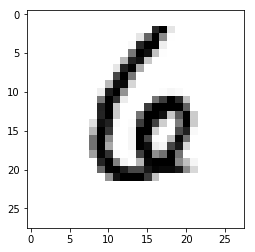


We can use encoding to pass it to trained model and decode data: 


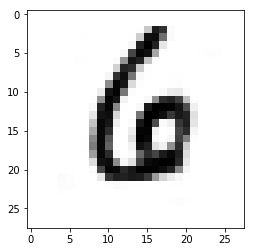

In [20]:
# encoding image into `encoding size` values
encoded_test_image = session.run([encoded], feed_dict={inputs_: [random_test_image]})

# encoding presentation
print("Following " + str(len(encoded_test_image[0][0])) + " numbers:\n")
print(encoded_test_image[0][0])
print("\nRepresents an image: ")
plt.imshow(random_test_image.reshape(28, 28), cmap="gray_r")
plt.show()

# decoding -> recreating image from `encoding size` numbers array
print("\nWe can use encoding to pass it to trained model and decode data: ")
decoded_test_image = session.run([decoded], feed_dict={encoded: [encoded_test_image[0][0]]})

# decoding presentation
plt.imshow(decoded_test_image[0][0].reshape((28, 28)), cmap="gray_r")
plt.show()

More results: 


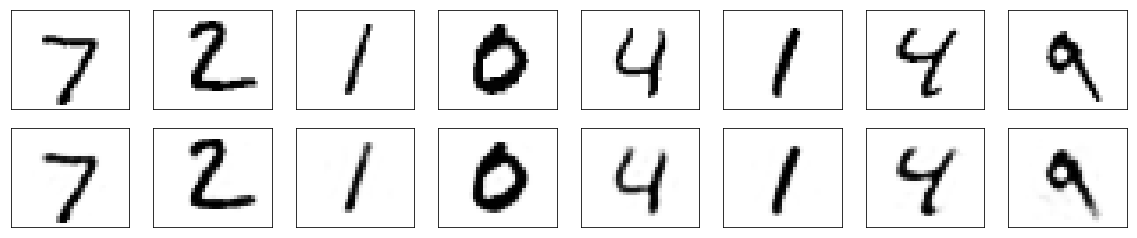

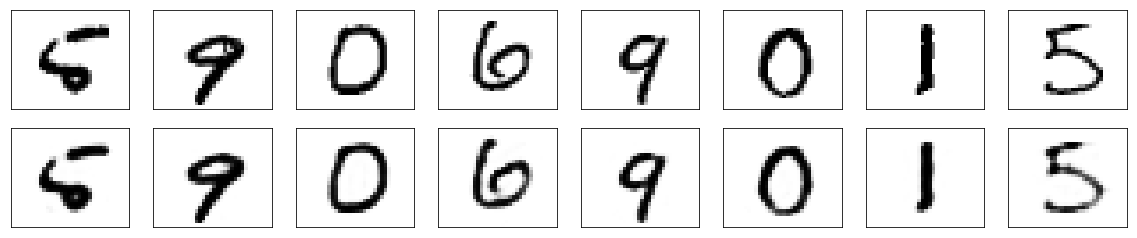

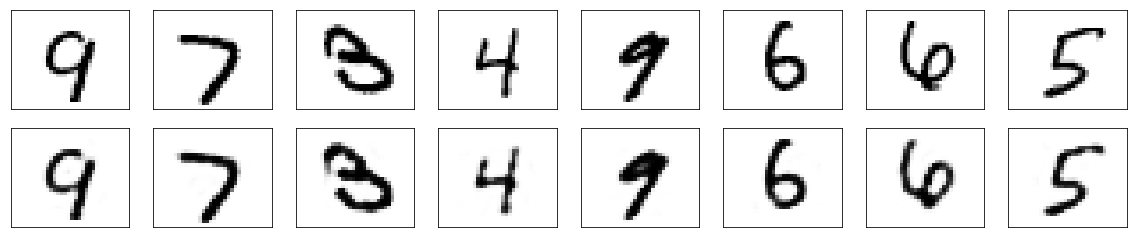

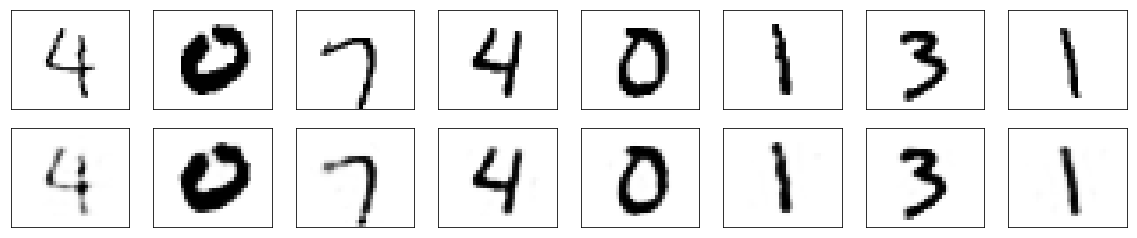

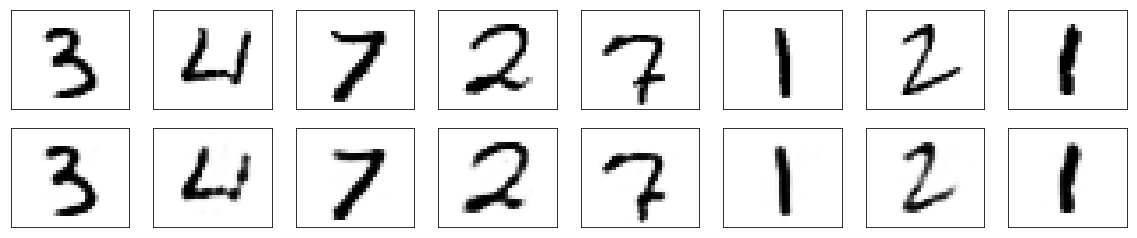

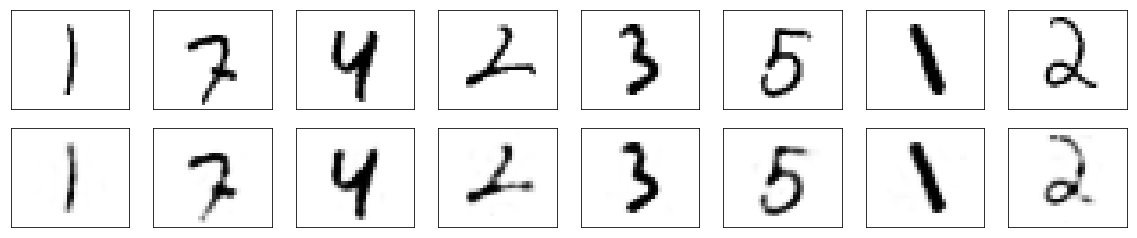

In [21]:
example_rows_to_show = 6

print("More results: ")
for i in range(example_rows_to_show):
    figure, axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(20,4))
    images = test_images[(i*8):(i+1)*8]
    encodings, decodings = session.run([encoded, decoded], feed_dict={inputs_: images})
    
    for images_and_decodings, plot_row in zip([images, decodings], axes):
        for img, ax in zip(images_and_decodings, plot_row):
            ax.imshow(img.reshape((28, 28)), cmap='gray_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

In [22]:
session.close()